<a href="https://colab.research.google.com/github/MIlanJP/Capstione-Unsupervised-Customer-Segmentation/blob/master/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, ward,linkage
from IPython.display import Markdown, display
from sklearn.cluster import DBSCAN

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
customer_data=pd.read_csv('/content/drive/MyDrive/Online Retail.csv',encoding= 'unicode_escape')

customer_data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       01-12-2010 08:26       2.55     17850.0  United Kingdom  
1       01-12-2010 08:26       3.39     17850.0  United Kingdom  
2       01-12-2010 08:26       2.75     17850.0  United Kingdom  
3       01-12-2010 08:26       3.39     17850.0  United Kingdom  
4       01-12-2010 08:26       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
541904  09-12-2011 12:50       0.85     12680.0          France  
541905  09-12-2011 12:50       2.10     12680.0          France  
541906  09-12-2011 12:50       4.15     12680.0          France  
541907  09-12-2011 12:50       4.15     12680.0          France  
541908  09-12-2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [4]:
# Printing the shape of the dataset
customer_data.shape

(541909, 8)

In [5]:
# Printing the information of the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# printing the first 5 samples of the dataset
customer_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [7]:
# printing the last 5 samples of the dataset
customer_data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID Country  
541904  09-12-2011 12:50       0.85     12680.0  France  
541905  09-12-2011 12:50       2.10     12680.0  France  
541906  09-12-2011 12:50       4.15     12680.0  France  
541907  09-12-2011 12:50       4.15     12680.0  France  
541908  09-12-2011 12:50       4.95     12680.0  France

In [8]:
# Checking all the columns present in the dataset
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
# Printing the descriptive statistics
customer_data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

# Data Cleaning

In [10]:
# Printing the number of the missing values in the columns
pd.DataFrame(customer_data.isna().mean()*100)

0
InvoiceNo     0.000000
StockCode     0.000000
Description   0.268311
Quantity      0.000000
InvoiceDate   0.000000
UnitPrice     0.000000
CustomerID   24.926694
Country       0.000000

### 25 % of items purchase are not assigned to  Customers
- Hence there is no use of having the data with out customer assignment
- So its better to Delete them from data frame

<br>
<br>

 - Checking the number of the duplicate value in the dataset



In [11]:
  # Checking duplicates
  print(len(customer_data[customer_data.duplicated()]))

5268


- Checking the change in the shape of the dataset while dropping the duplicates

In [12]:
# Printing the shape of the dataset before removing duplicates
print('Printing the shape of datset before removing duplicates',customer_data.shape)
# Dropping duplicate rows
customer_data.drop_duplicates(inplace=True)
# Printing the shape of the dataset after removing duplicates
print('Printing the shape of datset after removing duplicates',customer_data.shape)

Printing the shape of datset before removing duplicates (541909, 8)
Printing the shape of datset after removing duplicates (536641, 8)


- Dropping the null values from the Customer ID column

In [13]:
# Dropping the null values from the Customer ID columns
customer_data.dropna(subset=['CustomerID'],inplace=True)


- Checking the null values from the dataset

In [14]:
# Checking the presence of the null values
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- There are no null values in the dataset

# Feature Engineering

In [15]:
customer_data["InvoiceDate"]=pd.to_datetime(customer_data["InvoiceDate"])
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [16]:
# Creating new features from the datetime column InvoiceDate
customer_data["year"]      = customer_data["InvoiceDate"].apply(lambda x: x.year)
customer_data['Month']     = customer_data['InvoiceDate'].apply(lambda x: x.month_name())
customer_data['Day']       = customer_data['InvoiceDate'].apply(lambda x: x.day_name())
customer_data["hour"]      = customer_data["InvoiceDate"].apply(lambda x: x.hour)


# Data Visualization

## Converting the Invoice date to Date time datatype

In [17]:
customer_data["InvoiceDate"]=pd.to_datetime(customer_data["InvoiceDate"])
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   year         401604 non-null  int64         
 9   Month        401604 non-null  object        
 10  Day          401604 non-null  object        
 11  hour         401604 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 39.8+ MB


## Calculating the Total Amount for each Product purchase (Quantity X Unit Price)

In [18]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
customer_data['TotalAmount'] = customer_data['Quantity']*customer_data['UnitPrice']

## Extracting features from Invoice Date like

1.   date
2.   hour
3.   parts of day



In [19]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
customer_data['TimeType'] = np.where((customer_data["hour"]>5)&(customer_data["hour"]<18), np.where(
                           customer_data["hour"]<12, 'Morning','Afternoon'),'Evening')

In [20]:
# Dropping cancellations from the main dataframe
customer_data = customer_data[~customer_data['InvoiceNo'].str.contains('C')]

# Exploratory Data Analysis

## Above are list of the items in the given data that are never made a revenue (zero sales)  
- Because came back due to cancellation 

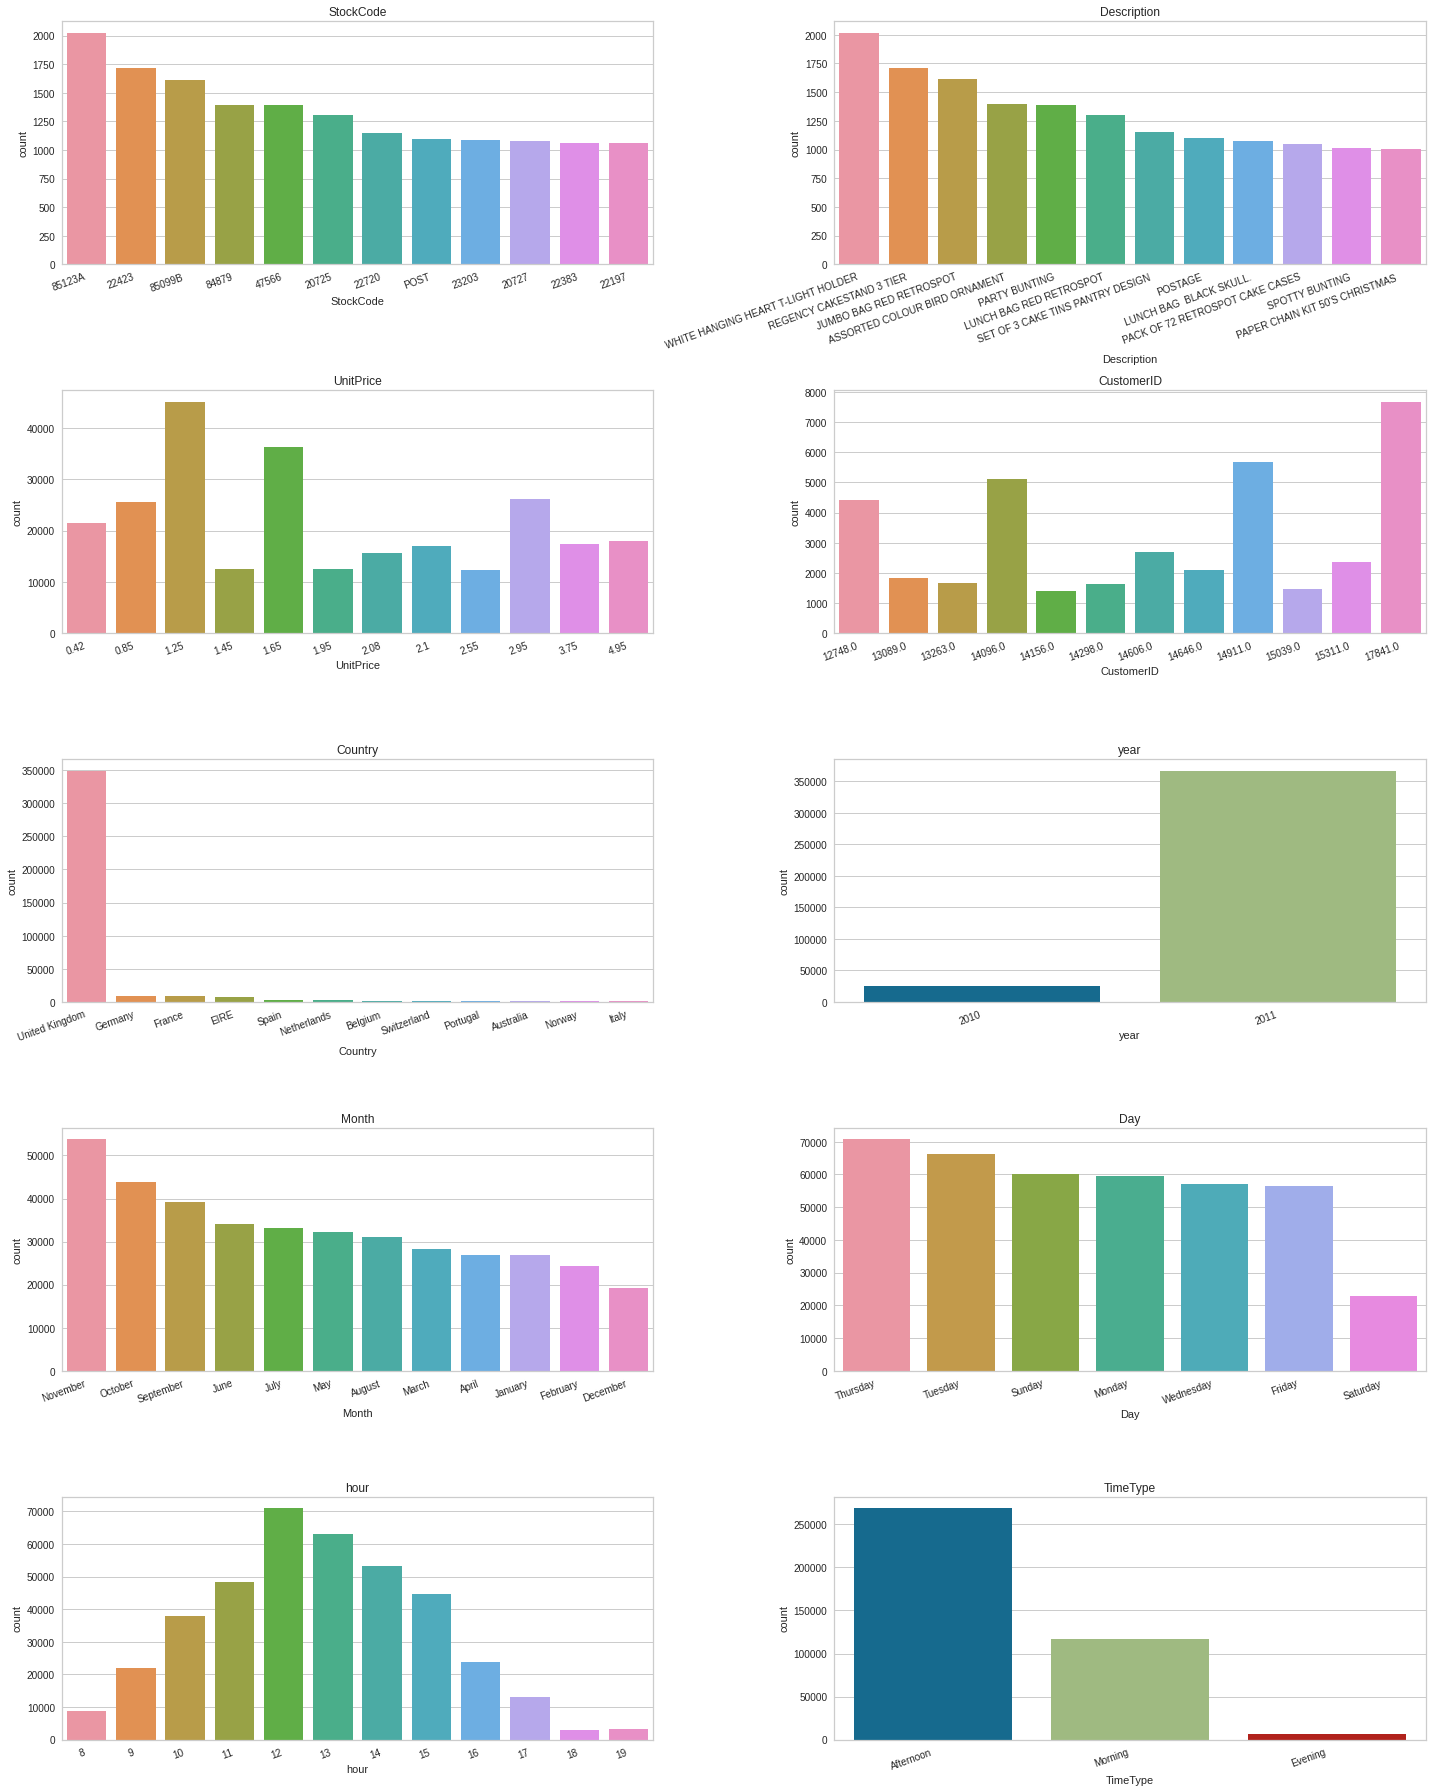

In [21]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']
plt.figure(figsize=(20,25))
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = customer_data[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.title(target[n])
  plt.tight_layout()

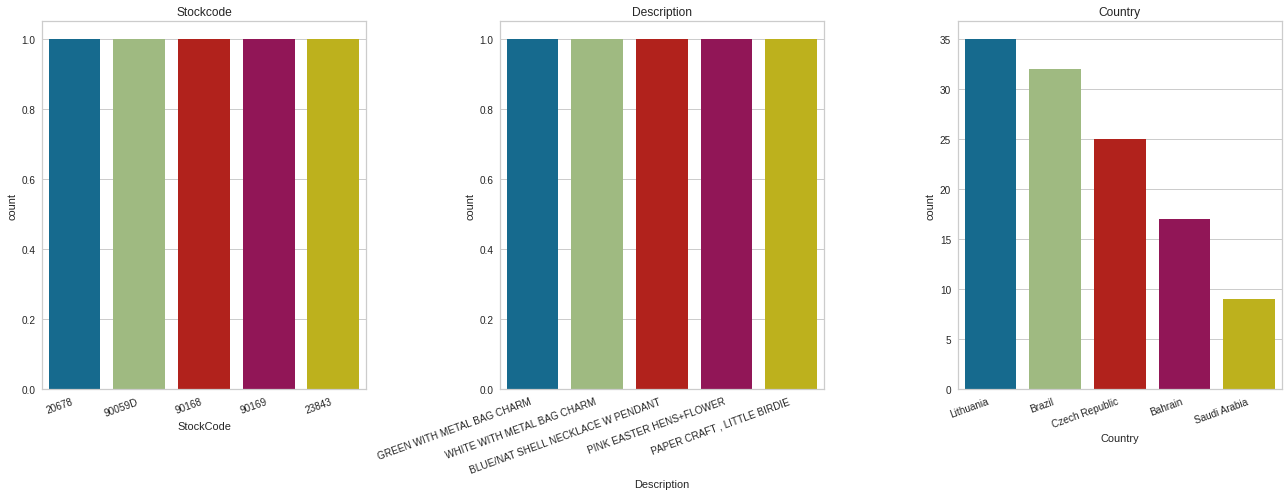

In [22]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(18,7))
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = customer_data[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

Observations/Hypothesis:
1. Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers 
2. There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
3. Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
4. Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

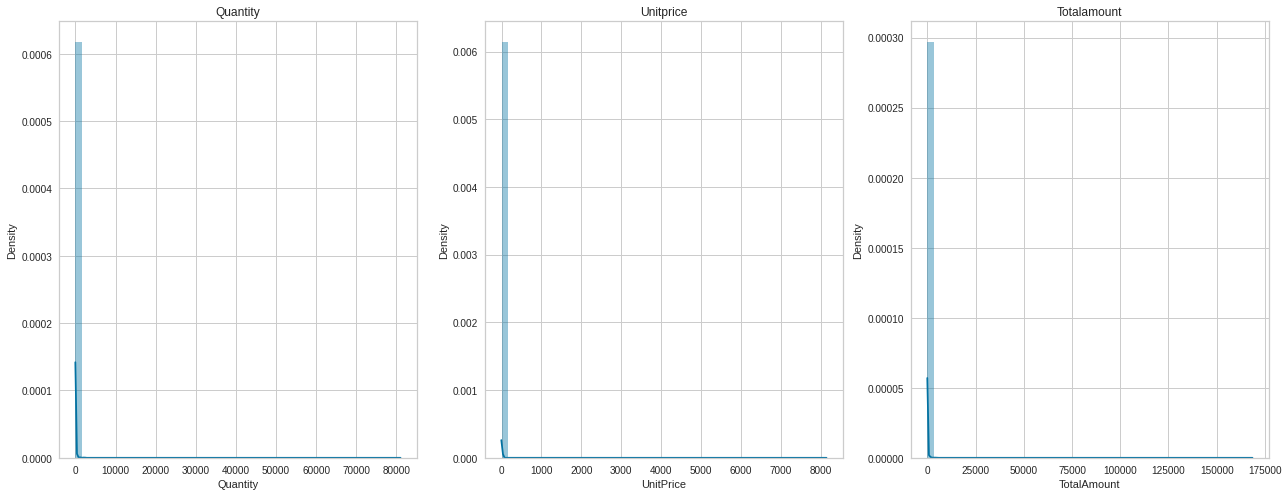

In [23]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(18,7))

for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(customer_data[col])
  plt.title(col.title())
  plt.tight_layout()

Observation:
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
2. For symmetric graph mean=median=mode.

[]

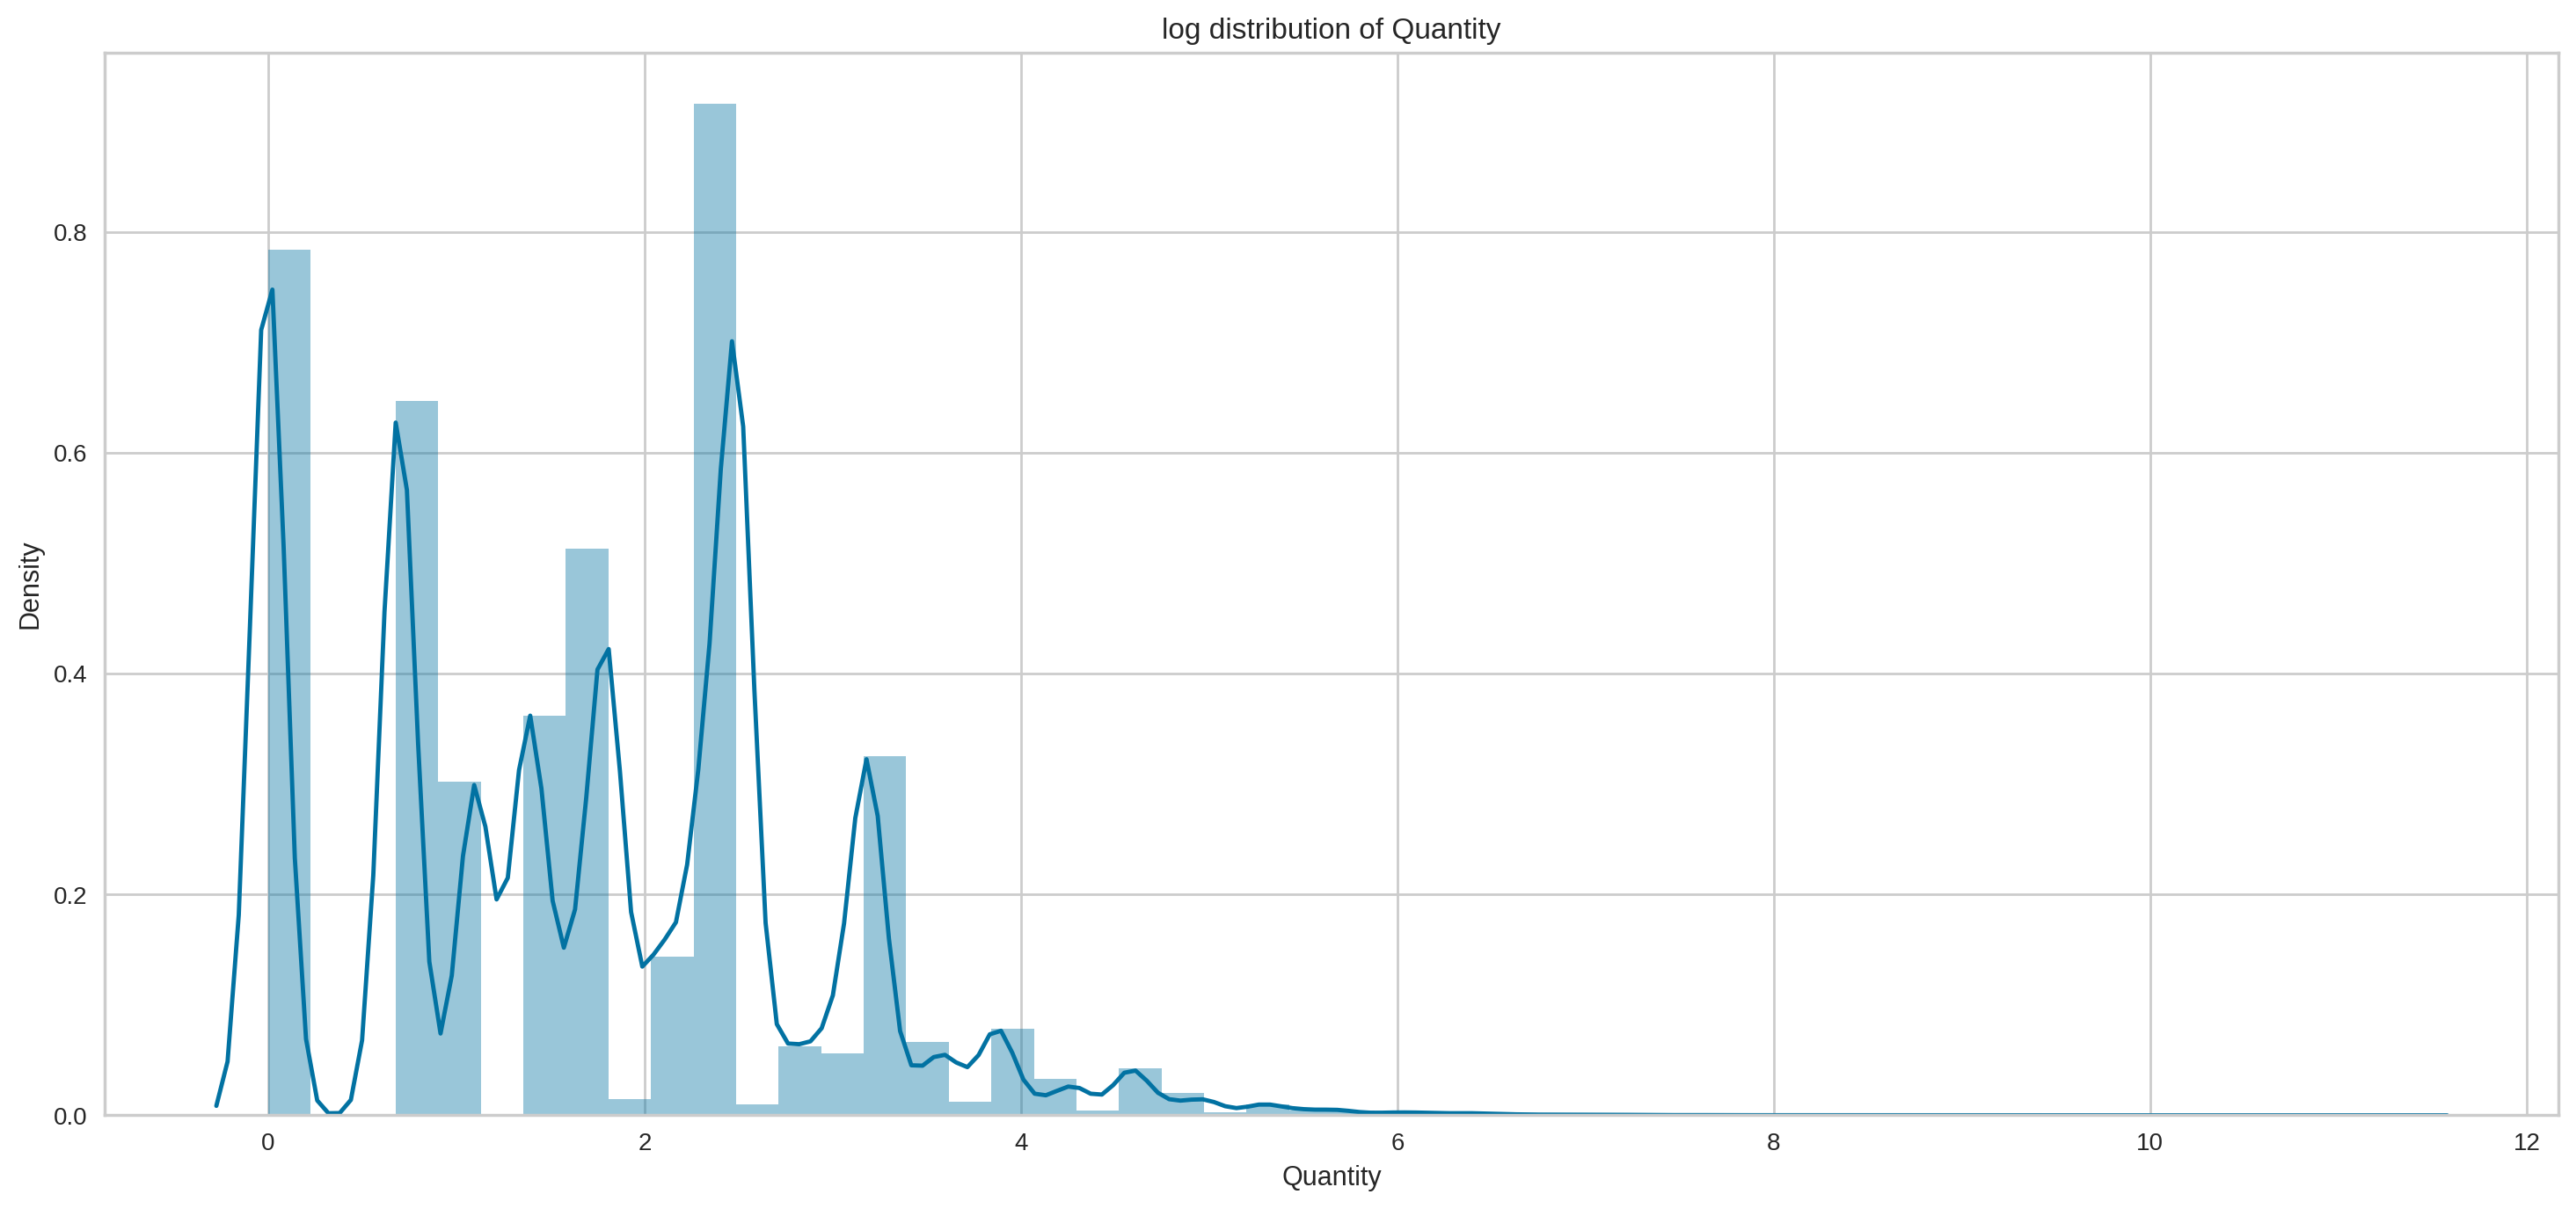

In [24]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(18,8),dpi=200)
plt.title('log distribution of Quantity')
sns.distplot(np.log(customer_data['Quantity']))
plt.plot()

In [25]:
# Most orders placed are from these countries
country_invoice = customer_data.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

Country  Invoice_Count
35  United Kingdom          16649
14         Germany            457
13          France            389
10            EIRE            260
3          Belgium             98

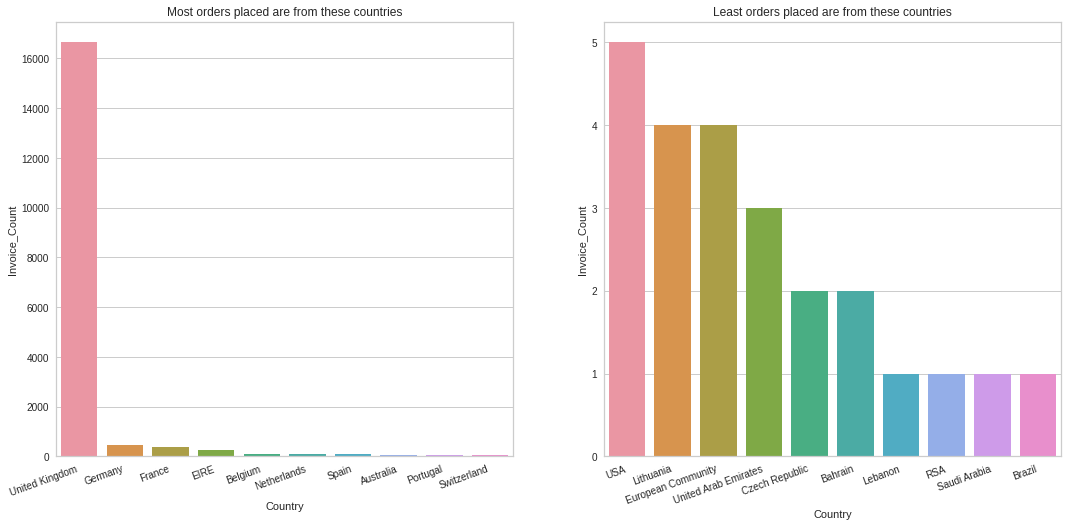

In [26]:
# Visualizing top and bottom 10 countries based on total invoices 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

In [27]:
# Most customers are from these countries
country_cust = customer_data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
35  United Kingdom            3921
14         Germany              94
13          France              87
30           Spain              30
3          Belgium              25

* United Kingdom has most number of customers 


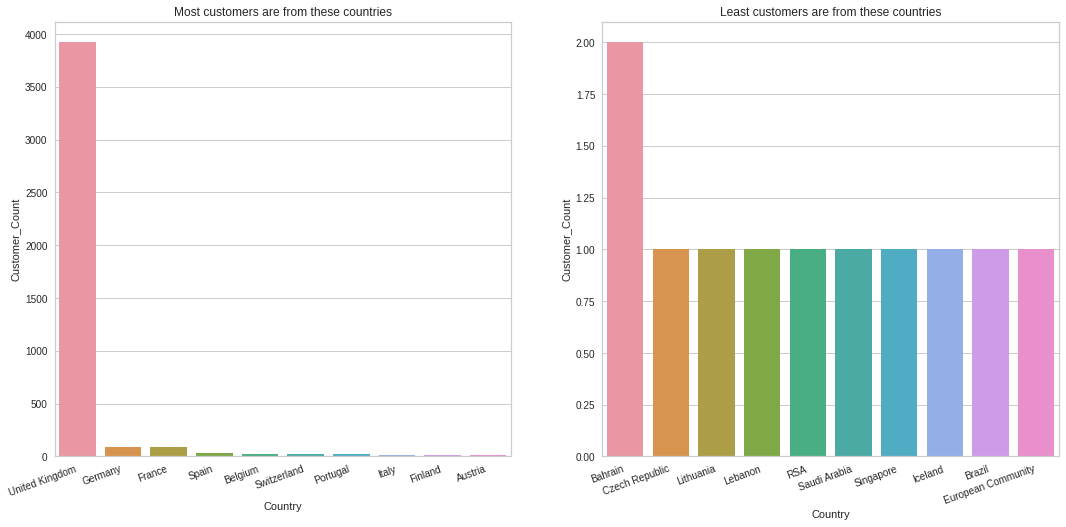

In [28]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [29]:
# Most customers are from these countries
country_cust = customer_data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
35  United Kingdom            3921
14         Germany              94
13          France              87
30           Spain              30
3          Belgium              25

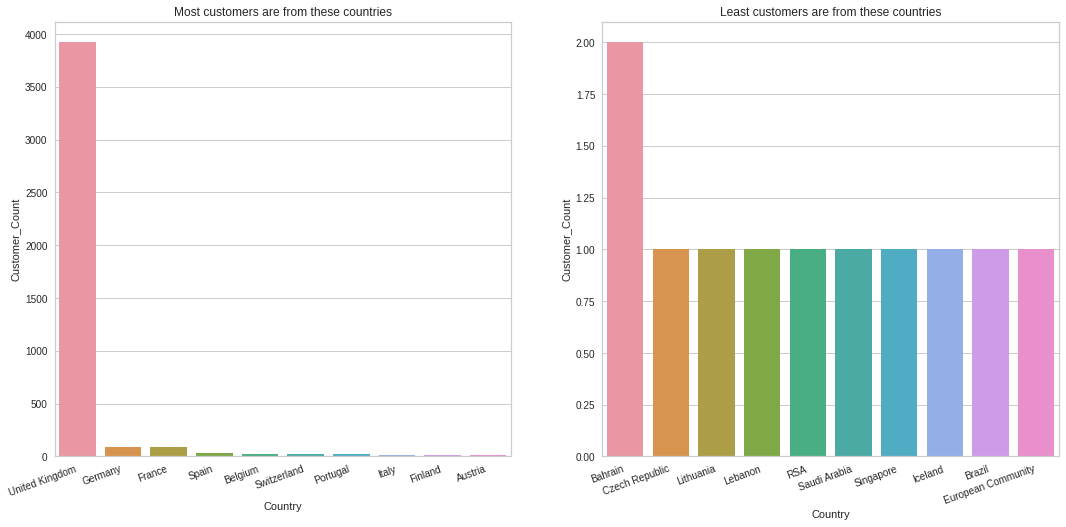

In [30]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [31]:
# Countrywise average item purchases
country_quantity = customer_data.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
23     Netherlands         85.034702
19           Japan         81.046729
31          Sweden         80.173333
0        Australia         71.114020
8   Czech Republic         26.840000

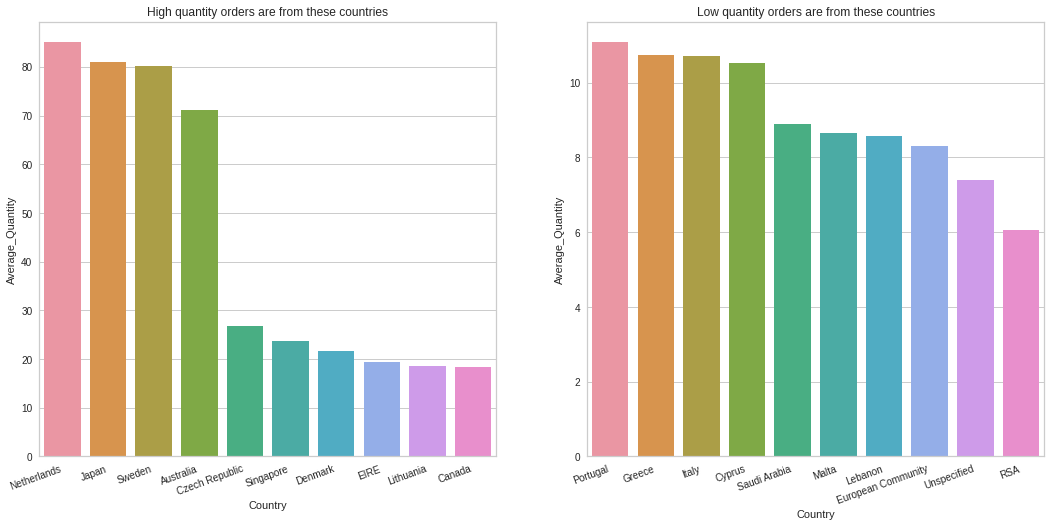

In [32]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [33]:
# quantity wise item purchases
product_quantity = customer_data.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1762             JUMBO BAG RED RETROSPOT     46078
3698  WHITE HANGING HEART T-LIGHT HOLDER     36706

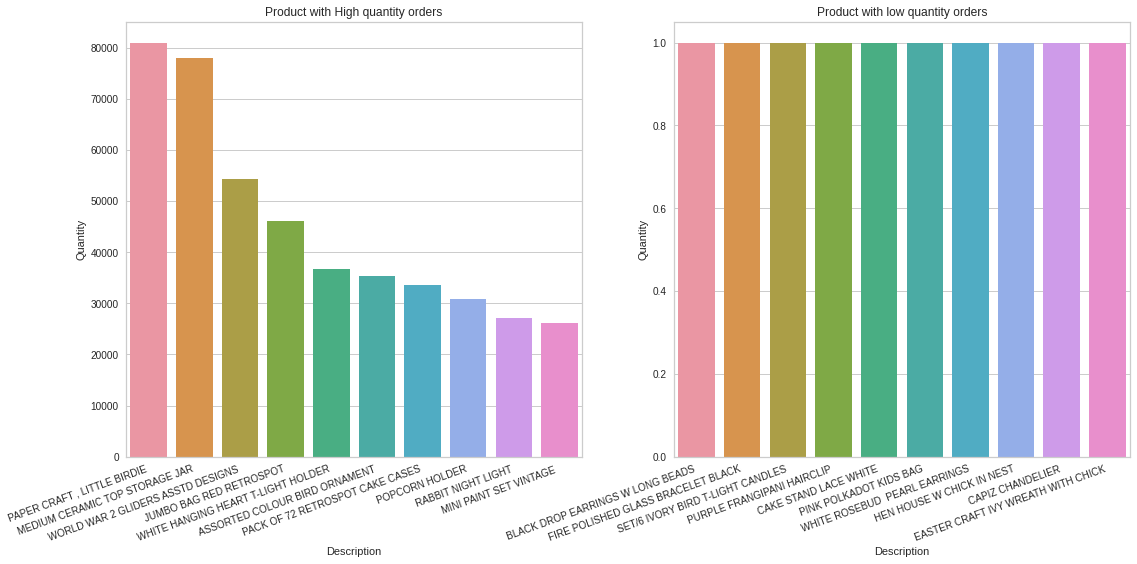

In [34]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [35]:
# Amount wise item purchases
product_price = customer_data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

Description  TotalAmount
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142264.75
3698  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
1762             JUMBO BAG RED RETROSPOT     85040.54
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

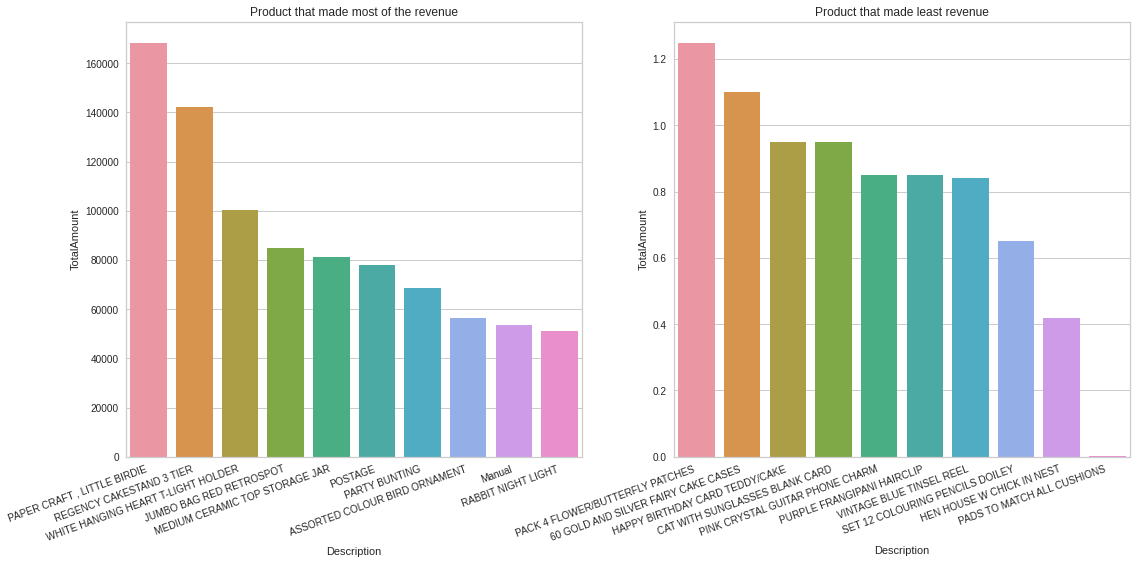

In [36]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [37]:
# customer wise item purchases
product_customer = customer_data.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

Description  Customer_Count
2767            REGENCY CAKESTAND 3 TIER             881
3698  WHITE HANGING HEART T-LIGHT HOLDER             856
2345                       PARTY BUNTING             708
216        ASSORTED COLOUR BIRD ORNAMENT             678
3001   SET OF 3 CAKE TINS PANTRY DESIGN              640

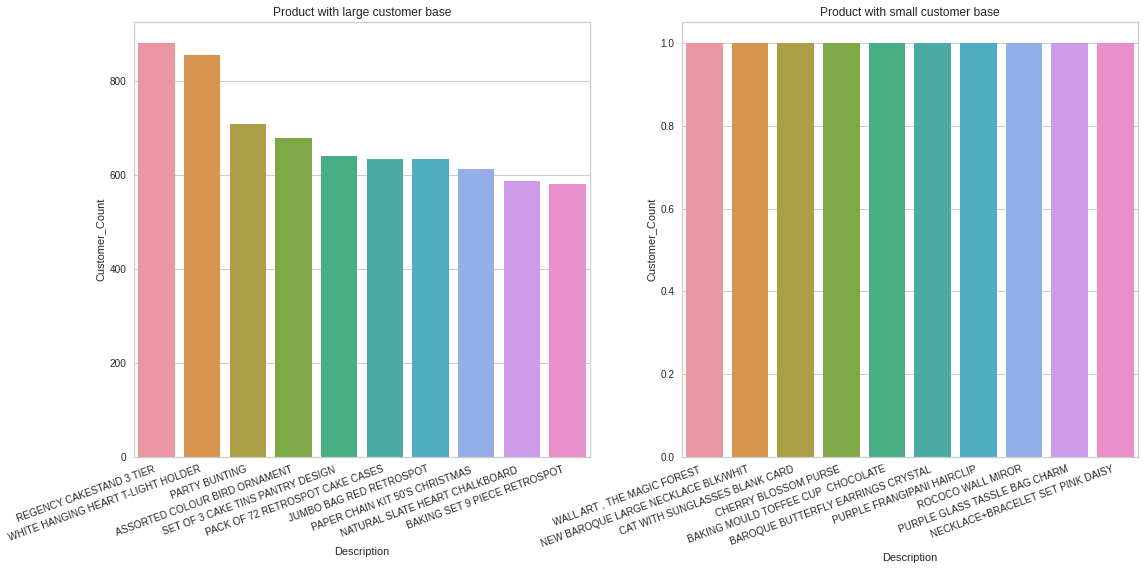

In [38]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [39]:
# grouping max_sold_item
max_sold_item =customer_data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
max_sold_item.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
max_sold_item.head()

Description  TotalAmount
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142264.75
3698  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
1762             JUMBO BAG RED RETROSPOT     85040.54
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

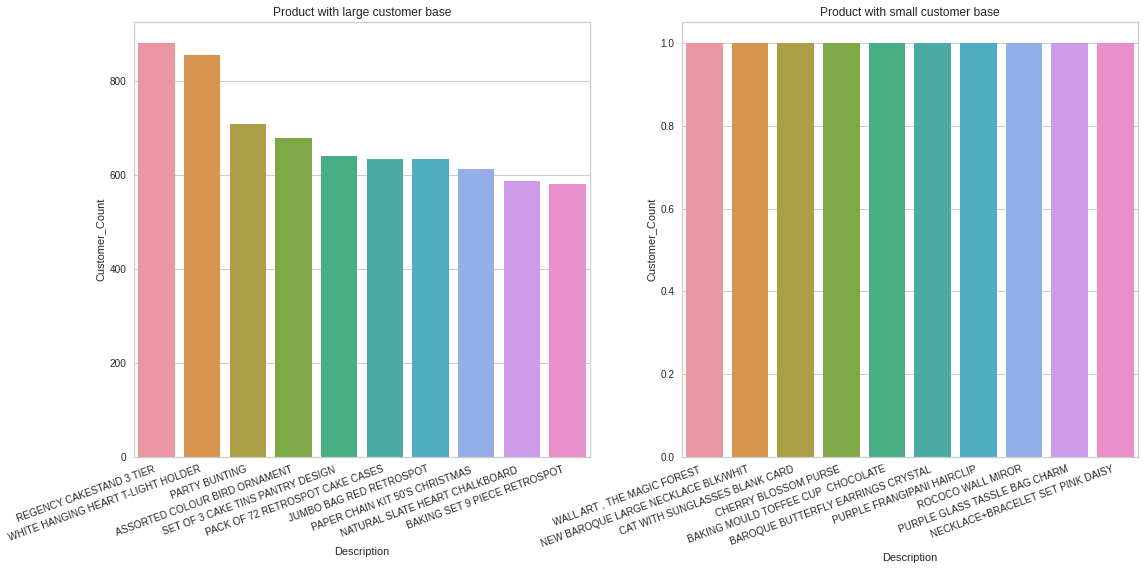

In [40]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [41]:
customer_data["InvoiceDate"].max()

Timestamp('2011-12-10 17:19:00')

- The Latest Date recorded is on 10th of December 2011

## RFM analysis
### 1. R- Recency (Recent on-line visit by the customers)
### 2. F- Frequency (How frequently customers visits on-line page)
### 3. M- Monetary (How much customers have spend by purchasing on-line products )

1. Since Most of the Customers are wholesalers we cannot group customers based on the **demographic group like age, gender, income** and **behavioral and psycho-graphic group**
2. Because Our Customers purchase bunch of goods from us and sell it to individual customers
3. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C  i.e. Direct from Business to Customers
4. **WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT** 
5. ***They sell it to individual customers(B2C) or sell all products to another stores (B2B)***

# Due to all these reasons we need to cluster customers according to there activities i.e
## 1. R- Recency
## 2. F- Frequency
## 3. M- Monetary


### We need to group customers by  
### 1. High Profile (Spends more Visits More)
### 2. Medium Profile (Spends Less Average On-line site Visit frequency )
### 3. Low Profile (Less On-line Site visit frequency (Customer about to lose interest [ Churning ]))

Source=https://www.optimove.com/resources/learning-center/rfm-segmentation

In [42]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = customer_data["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = customer_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()


CustomerID  Recency  Frequency  Monetary
0     12346.0      327          1  77183.60
1     12347.0       41        182   4310.00
2     12348.0       77         31   1797.24
3     12349.0       20         73   1757.55
4     12350.0      312         17    334.40

In [43]:
rfm.describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean    106.430053    90.512100    2048.215924
std     115.075862   225.515328    8984.248352
min       1.000000     1.000000       0.000000
25%      23.000000    17.000000     306.455000
50%      62.000000    41.000000     668.560000
75%     162.500000    98.000000    1660.315000
max     698.000000  7676.000000  280206.020000

In [44]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


 **Interpretation** 

1. Recency: How recent a customer made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary: How much money a customer spends.**bold text**

In [45]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']



Interpretation:
1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [46]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         327          1  77183.60  1  1  4  114          6   
12347.0          41        182   4310.00  3  4  4  344         11   
12348.0          77         31   1797.24  2  2  4  224          8   
12349.0          20         73   1757.55  4  3  4  434         11   
12350.0         312         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.789960       0.000000     11.253942  
12347.0        3.713572       5.204007      8.368693  
12348.0        4.343805       3.433987      7.494007  
12349.0        2.995732       4.290459      7.471676  
12350.0        5.743003       2.833213      5.812338

In [47]:
# Checking Descriptive Stats
rfm.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean    106.430053    90.512100    2048.216154     2.514865     2.487670   
std     115.075862   225.515328    8984.248299     1.125564     1.122724   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      23.000000    17.000000     306.455000     1.500000     1.000000   
50%      62.000000    41.000000     668.560000     3.000000     2.000000   
75%     162.500000    98.000000    1660.315000     4.000000     3.000000   
max     698.000000  7676.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.863102     7.502420     3.997700       3.670868   
std       1.118266   118.324959     2.790549     1.332004       1.321685   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   177.500000     5.000000     3.135494       2.833213   
50%       2.000000   311.000000     7.000000     4.127134       3.713572   
75%       3.500000   411.000000    10.000000     5.090673       4.584967   
max       4.000000   444.000000    12.000000     6.548219       8.945854   

       Monetary_Log  
count   4339.000000  
mean       6.584187  
std        1.265573  
min        0.000000  
25%        5.725071  
50%        6.505126  
75%        7.414763  
max       12.543280

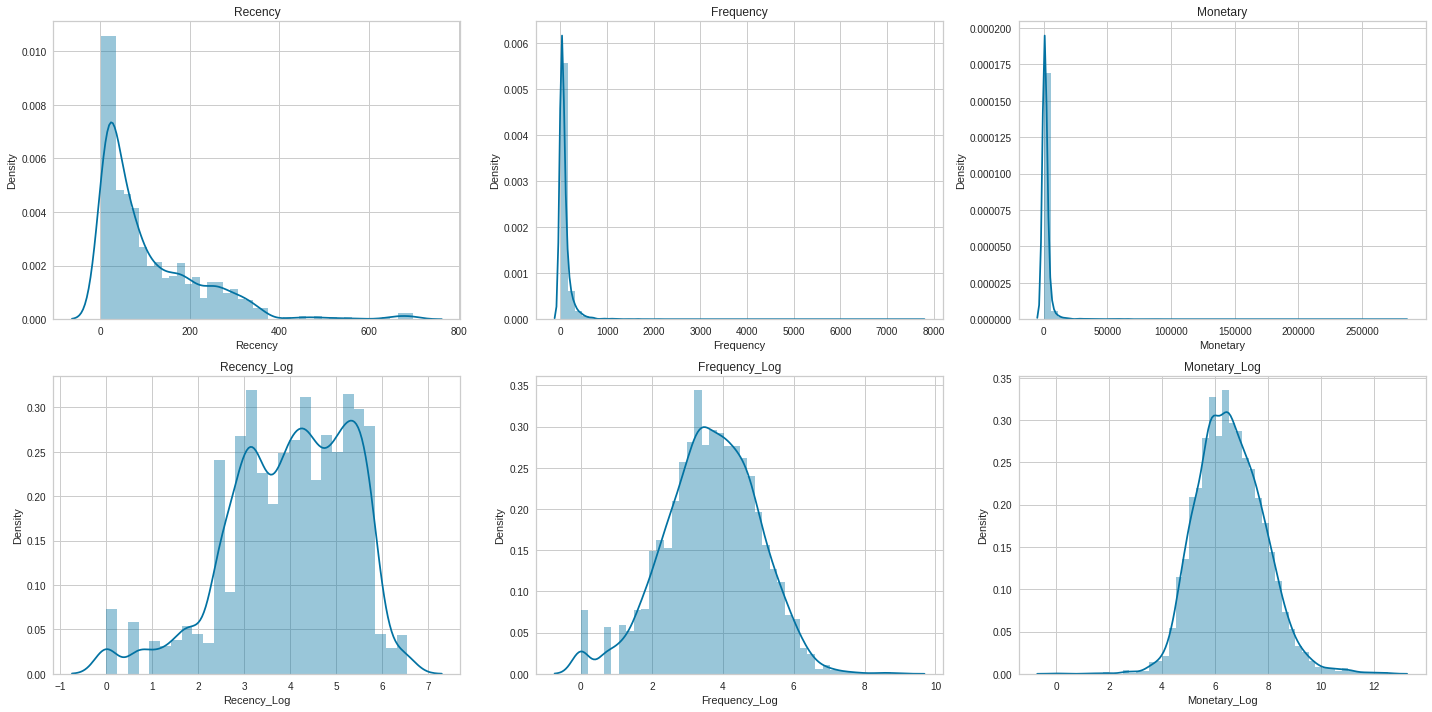

In [48]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10))
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

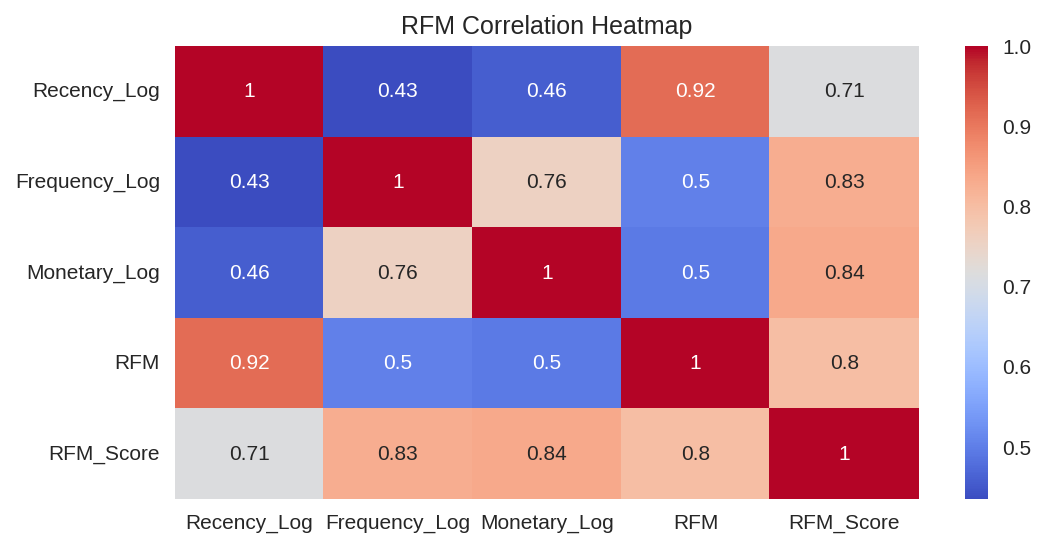

In [49]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4),dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **Clustering**

# **Modelling**

In [50]:
X=rfm[["Recency_Log",'Frequency_Log','Monetary_Log']]
X=StandardScaler().fit_transform(X)

In [51]:
from IPython.core.pylabtools import figsize

conclusion={}

def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]


def print_stats_(data,segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame

    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
  '''

  agg_=data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  agg_[f'Count {segment_name}']=data[segment_name].value_counts()
  return agg_

def print_conclusion(data,segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame

    Features:This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  agg_1=data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(
      {"Recency":lambda x:f'Visited {int(x.quantile(0.25))} to {int(x.quantile(0.75))}  days ago',
       "Frequency":lambda x:f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))}  Times",
       "Monetary":lambda x:f"Spent Around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling",
       })
  # Changing the name for the columns 
  agg_1.columns=["Visited",'Brought',"Money Spent"]
  return agg_1
  


# Defining a function for plotting clusters for Visualization
def plotc(y, title,segment_name,overlap_supress=0.1):
  '''
      Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
    Returns: Array of DataFrames

    features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
# PART 1
  # Setting the size of the figure

  plt.figure(figsize = (18, 8))
  ax = plt.axes(projection ="3d")                       # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')          # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')        # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')         # Setting Z label
  ax.set_title(title, fontweight ='bold')               #  Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, 
                  cmap='viridis')                       # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})              # positioning legend
  plt.show()

  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  rfm[segment_name] = y                                 # Copying segment values to main data frame

  agg_1=print_conclusion(rfm,segment_name)              # Calling the print Conclusion Function saving into a variable (agg_1)

  agg_=print_stats_(rfm,segment_name)                   # Calling the print stats Function saving into a variable (agg_1)

  rfm_copy=rfm.copy()
    
# PART 2
# Plotting the distribution
  fig,ax=plt.subplots(3,figsize=(25,25))

# Initializing array to store legends for features for different segment
  groups_recency=[]                                     
  groups_frequency=[]
  groups_monetary=[]

# Running a for loop for iterating through the number of clusters
  for i in rfm[segment_name].unique():
    # Adding the labels for the legends
    groups_recency.append(f'Recency Distribution of Group {i}')
    groups_frequency.append(f'Frequency Distribution of Group {i}')
    groups_monetary.append(f'Monetary Distribution of Group {i}')

    # Plotting Recency Histogram plot
    for j,col_ in enumerate(['Recency',"Frequency","Monetary"]):
      sns.distplot(cap_outliers(rfm_copy[rfm_copy[segment_name]==i][col_],overlap_supress),ax=ax[j],kde_kws=dict(linewidth=5))
   

# Assiging legends for all the axes
  ax[0].set_title("Recency",fontsize=40)  # Setting the main title for Recency
  ax[1].set_title("Frequency",fontsize=40) # Setting the main title for Frequency
  ax[2].set_title("Monetary",fontsize=40) # Setting the main title for Monetary
  ax[0].legend(groups_recency,prop={'size': 30})
  ax[1].legend(groups_frequency,prop={'size': 30})
  ax[2].legend(groups_monetary,prop={'size': 30})
  plt.show()
  # Displaying the stats of the data frame segment wise
  display(agg_.style.background_gradient(cmap="plasma").highlight_max(subset=['Frequency','Monetary']))
  display(agg_1)



  return agg_, agg_1


# Binning RFM Score

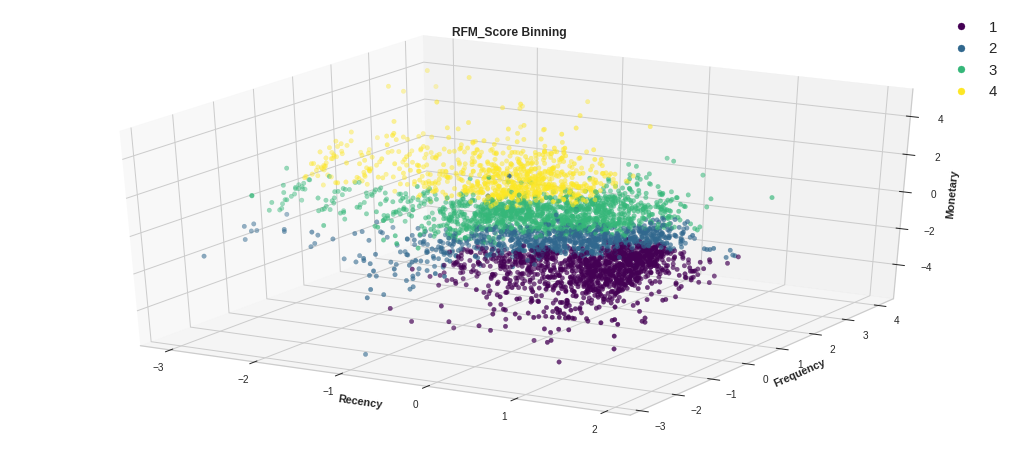

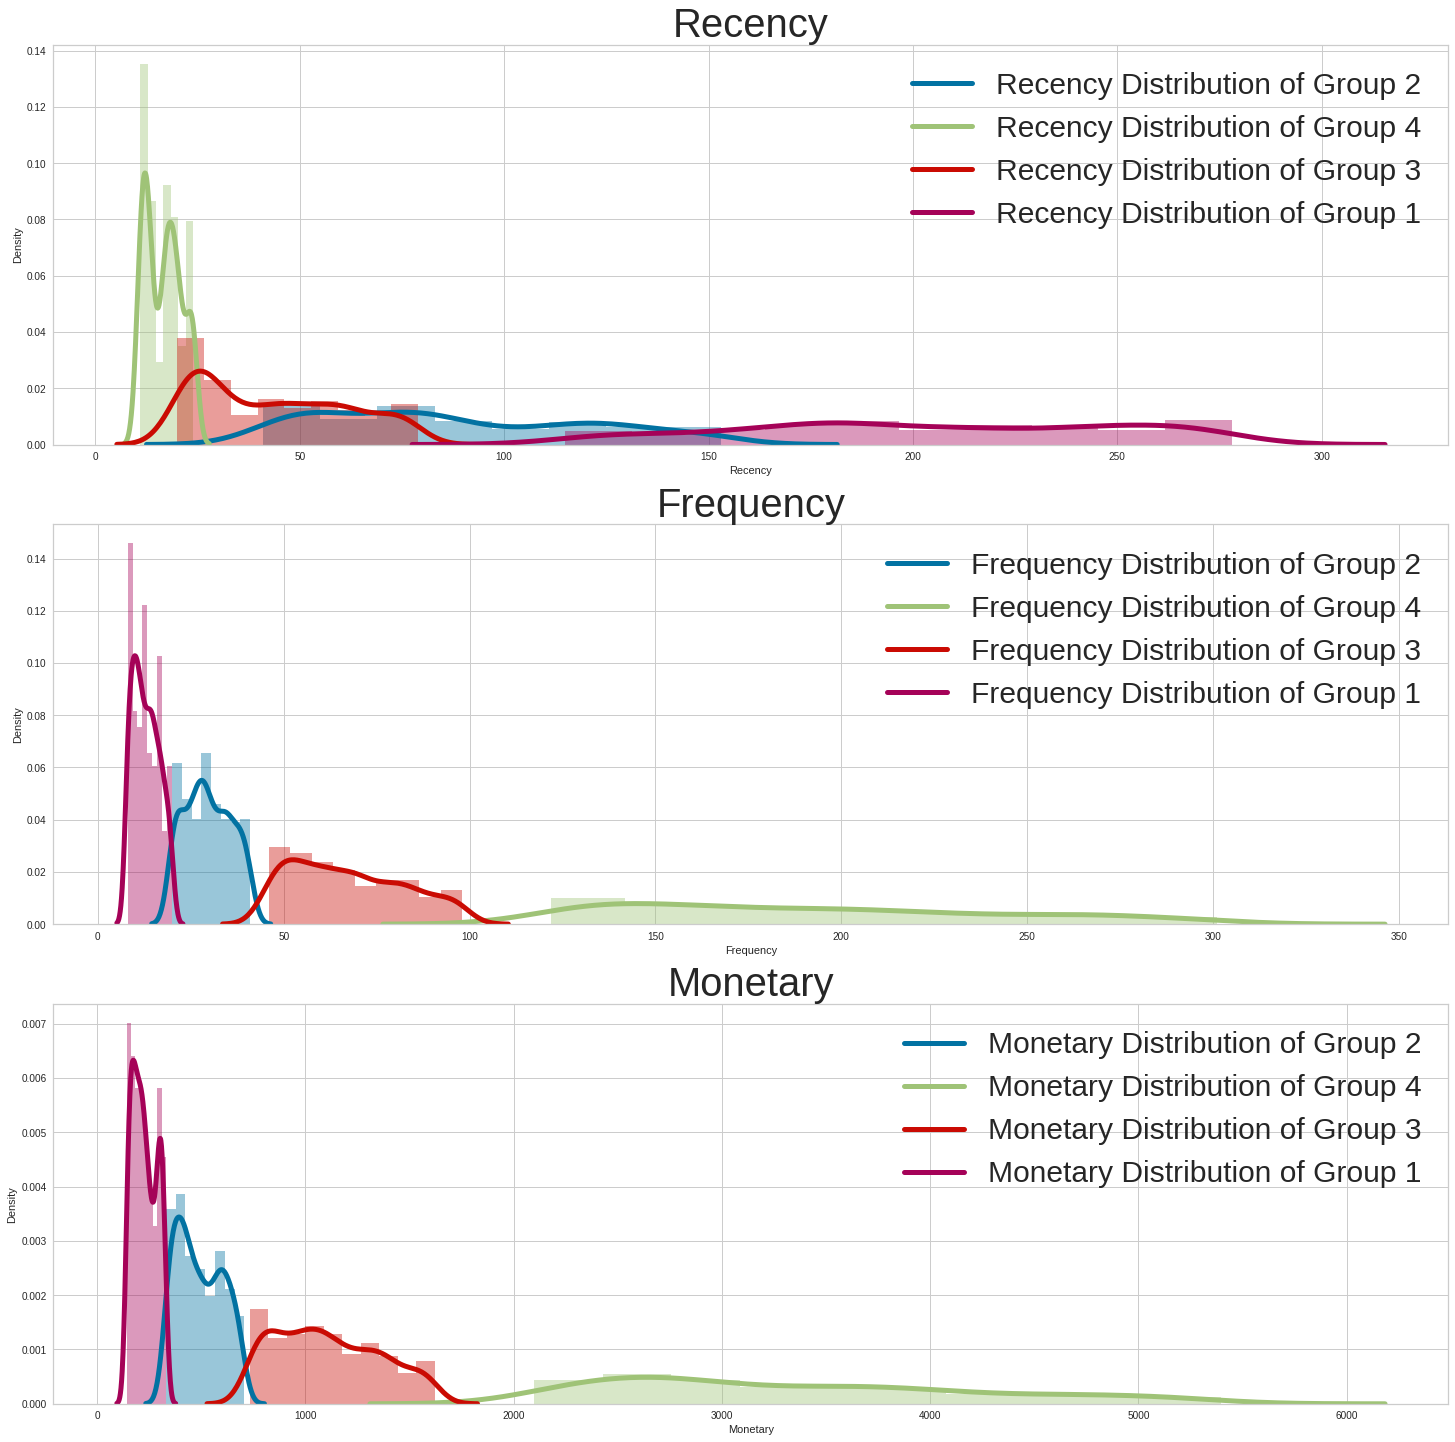

Visited                   Brought  \
Binning_Segment_                                                           
1                 Visited 114 to 279  days ago     Bought 7 to 21  Times   
2                  Visited 40 to 154  days ago    Bought 19 to 42  Times   
3                   Visited 19 to 79  days ago    Bought 45 to 99  Times   
4                   Visited 10 to 25  days ago  Bought 121 to 301  Times   

                                         Money Spent  
Binning_Segment_                                      
1                   Spent Around 141 to 330 Sterling  
2                   Spent Around 329 to 708 Sterling  
3                  Spent Around 732 to 1623 Sterling  
4                 Spent Around 2096 to 5396 Sterling

In [52]:
# Splitting RFM_Score in 4 bins based on quantiles
y_bin = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
conclusion['Binning_Segment_']=plotc(y_bin,title,"Binning_Segment_",0.25)


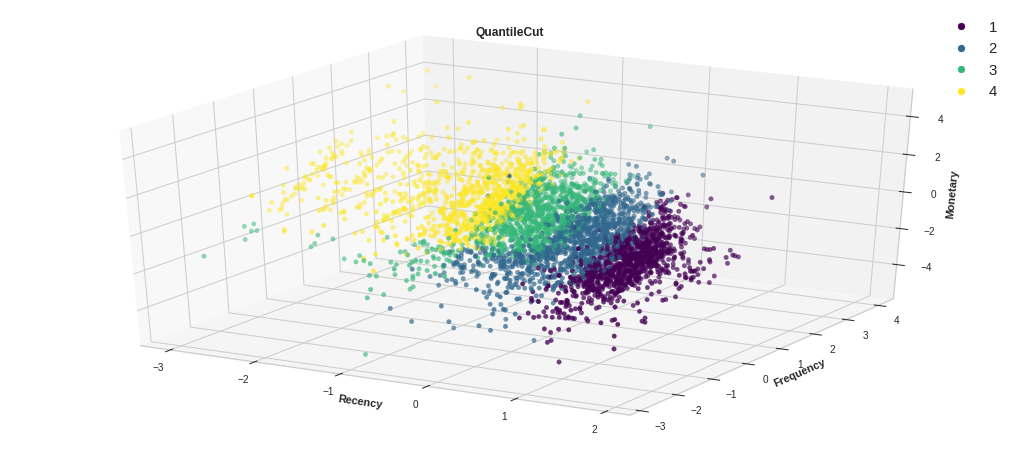

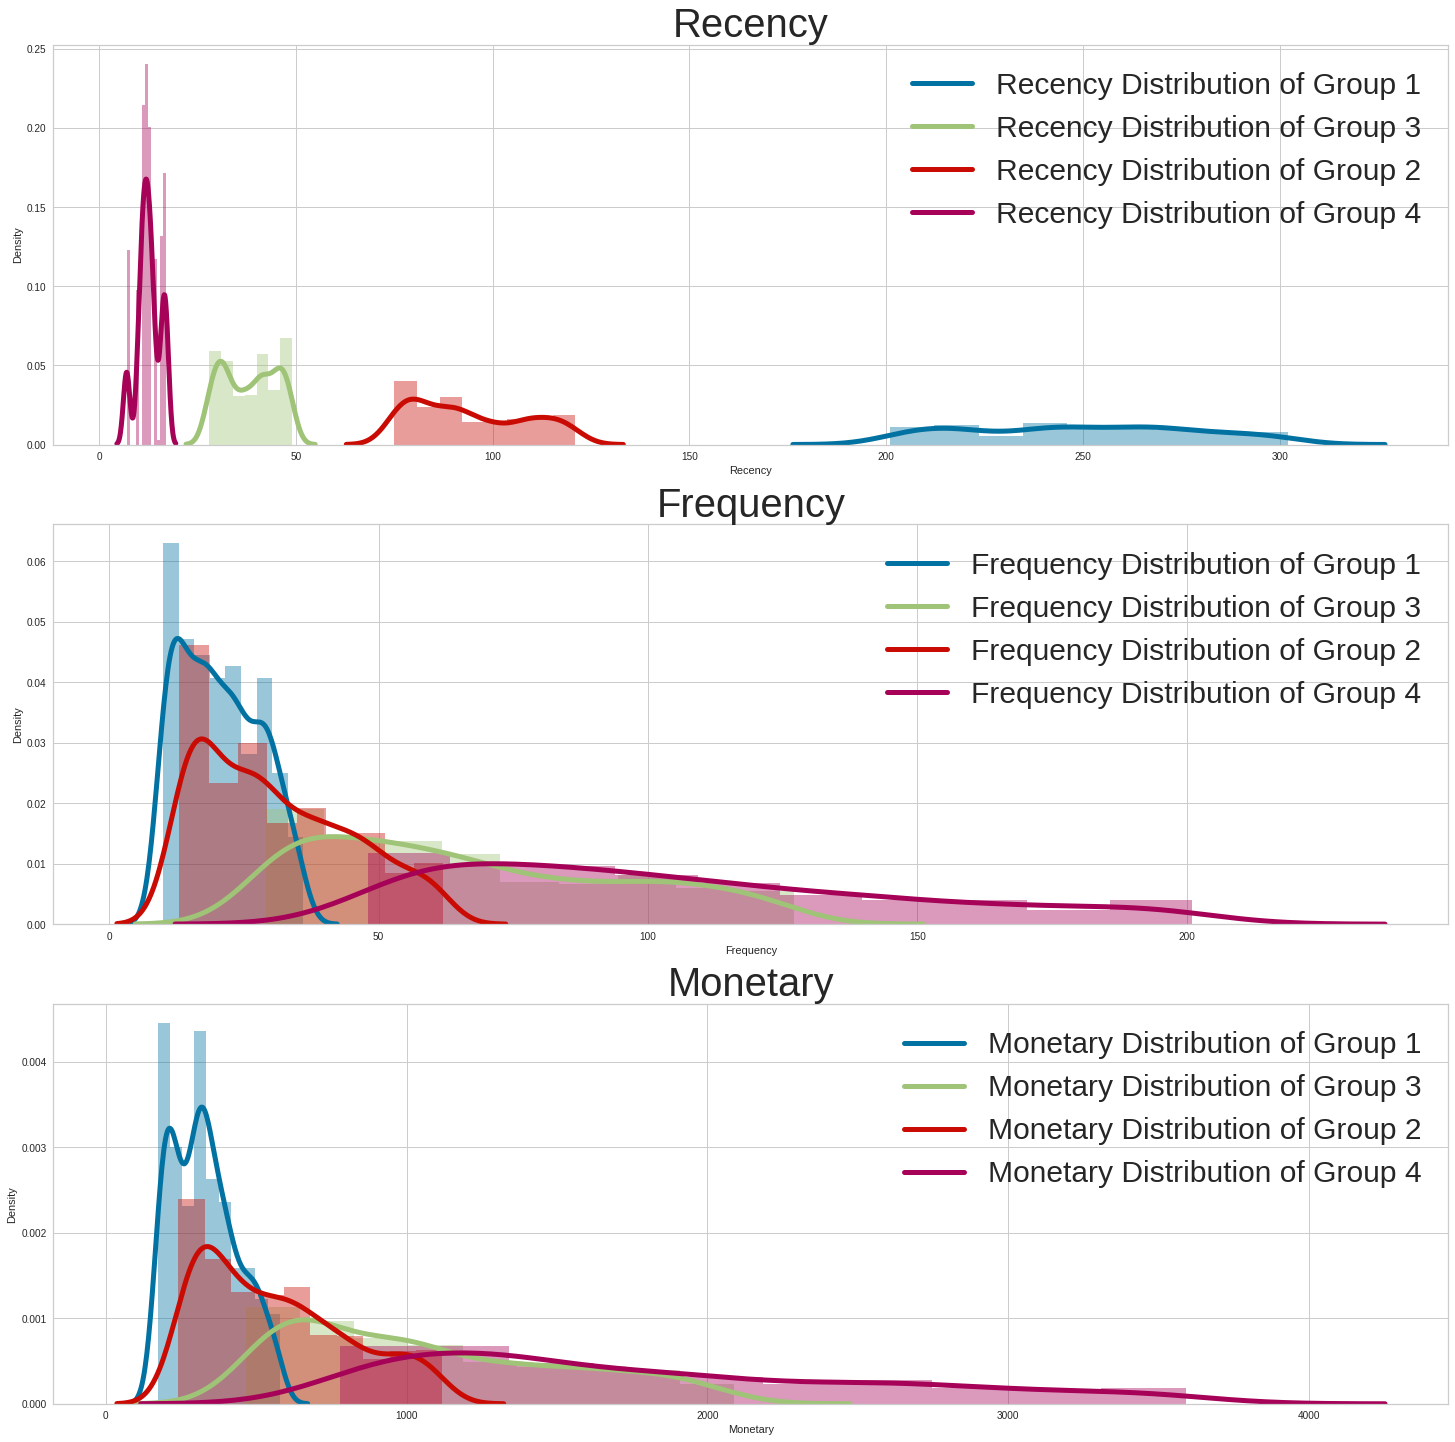

Visited  \
RFM Quantile Based Segmentation                                 
1                                Visited 200 to 303  days ago   
2                                 Visited 74 to 122  days ago   
3                                  Visited 27 to 51  days ago   
4                                   Visited 6 to 18  days ago   

                                                 Brought  \
RFM Quantile Based Segmentation                            
1                                  Bought 9 to 37  Times   
2                                 Bought 12 to 63  Times   
3                                Bought 28 to 128  Times   
4                                Bought 47 to 202  Times   

                                                       Money Spent  
RFM Quantile Based Segmentation                                     
1                                 Spent Around 172 to 582 Sterling  
2                                Spent Around 240 to 1120 Sterling  
3                                Spent Around 463 to 2093 Sterling  
4                                Spent Around 778 to 3593 Sterling

In [90]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
conclusion[segment_name] = plotc(y, segment_name, title, overlap_supress)

# K-Means Clustering 

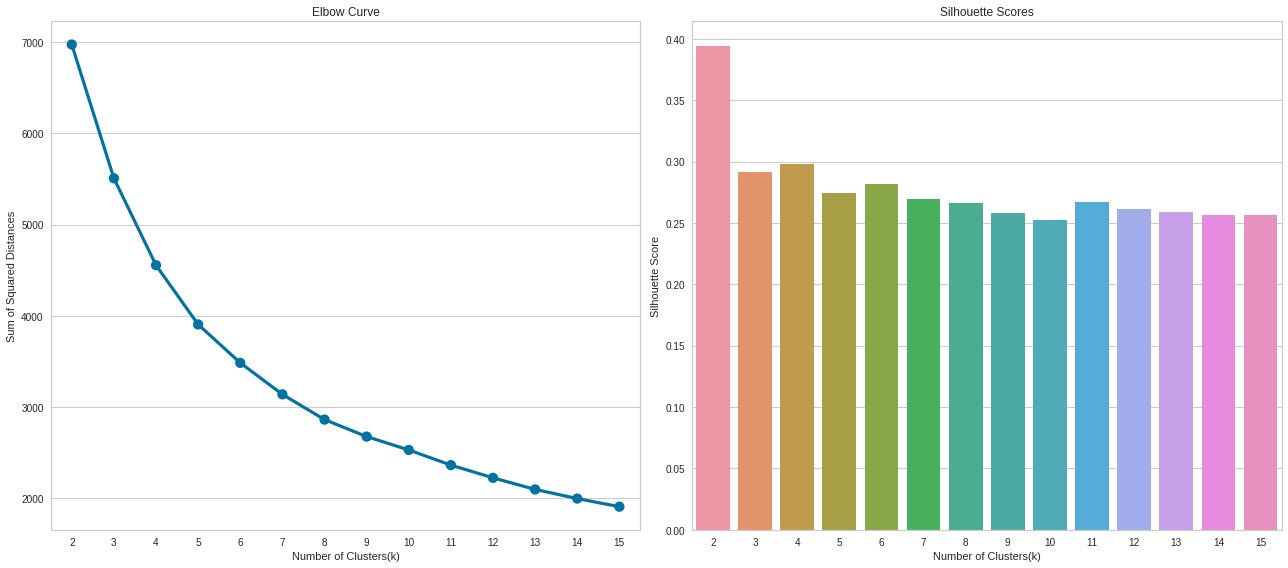

In [53]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(18,8))

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

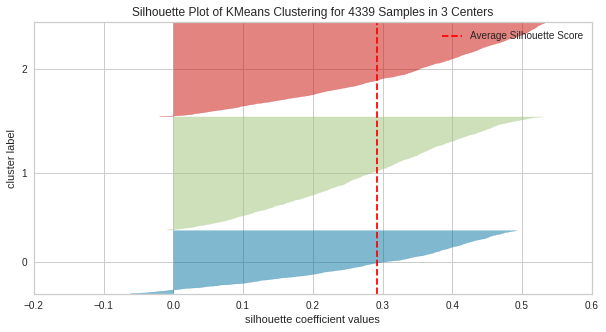

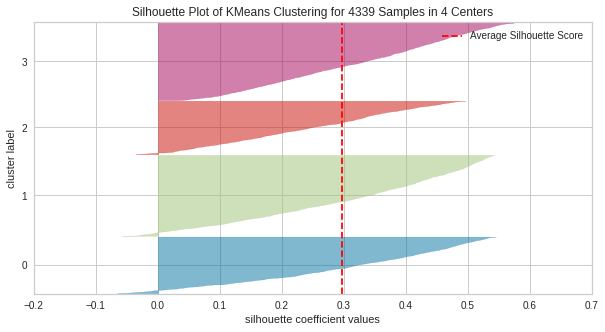

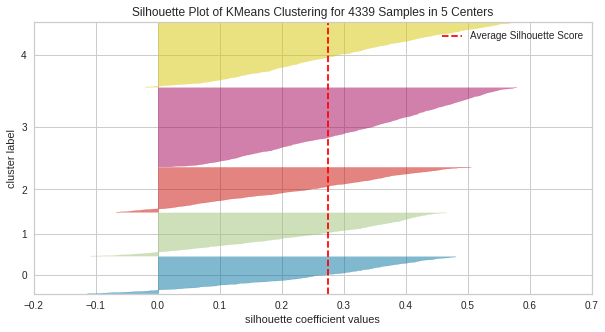

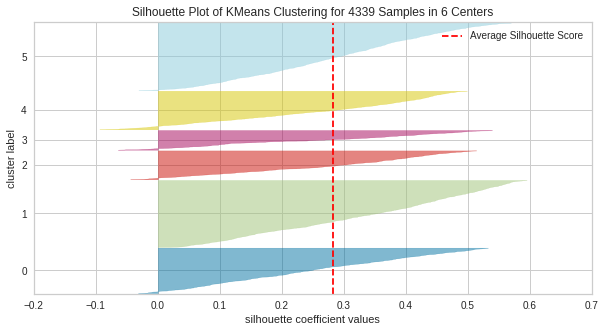

In [54]:
# Visualizing the Silouette plots for the clusters
for i in range(3,7):
    plt.figure(figsize = (10, 5))
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

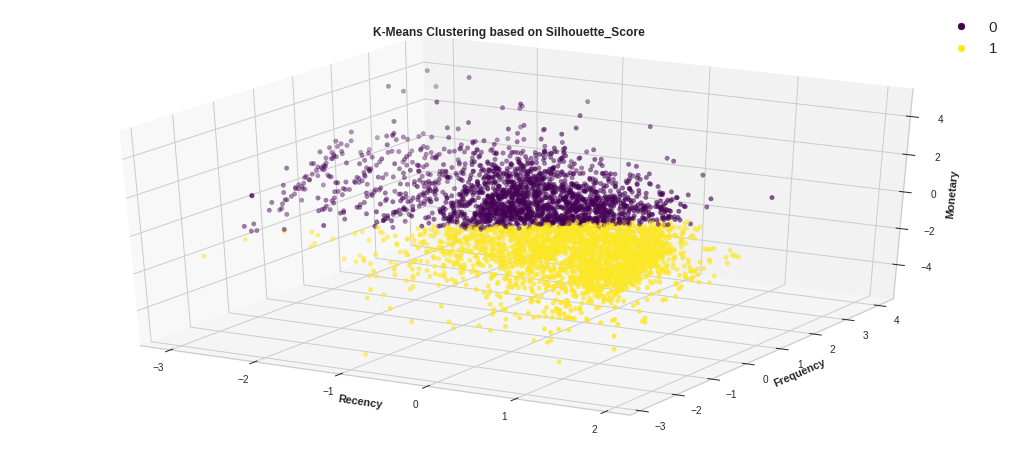

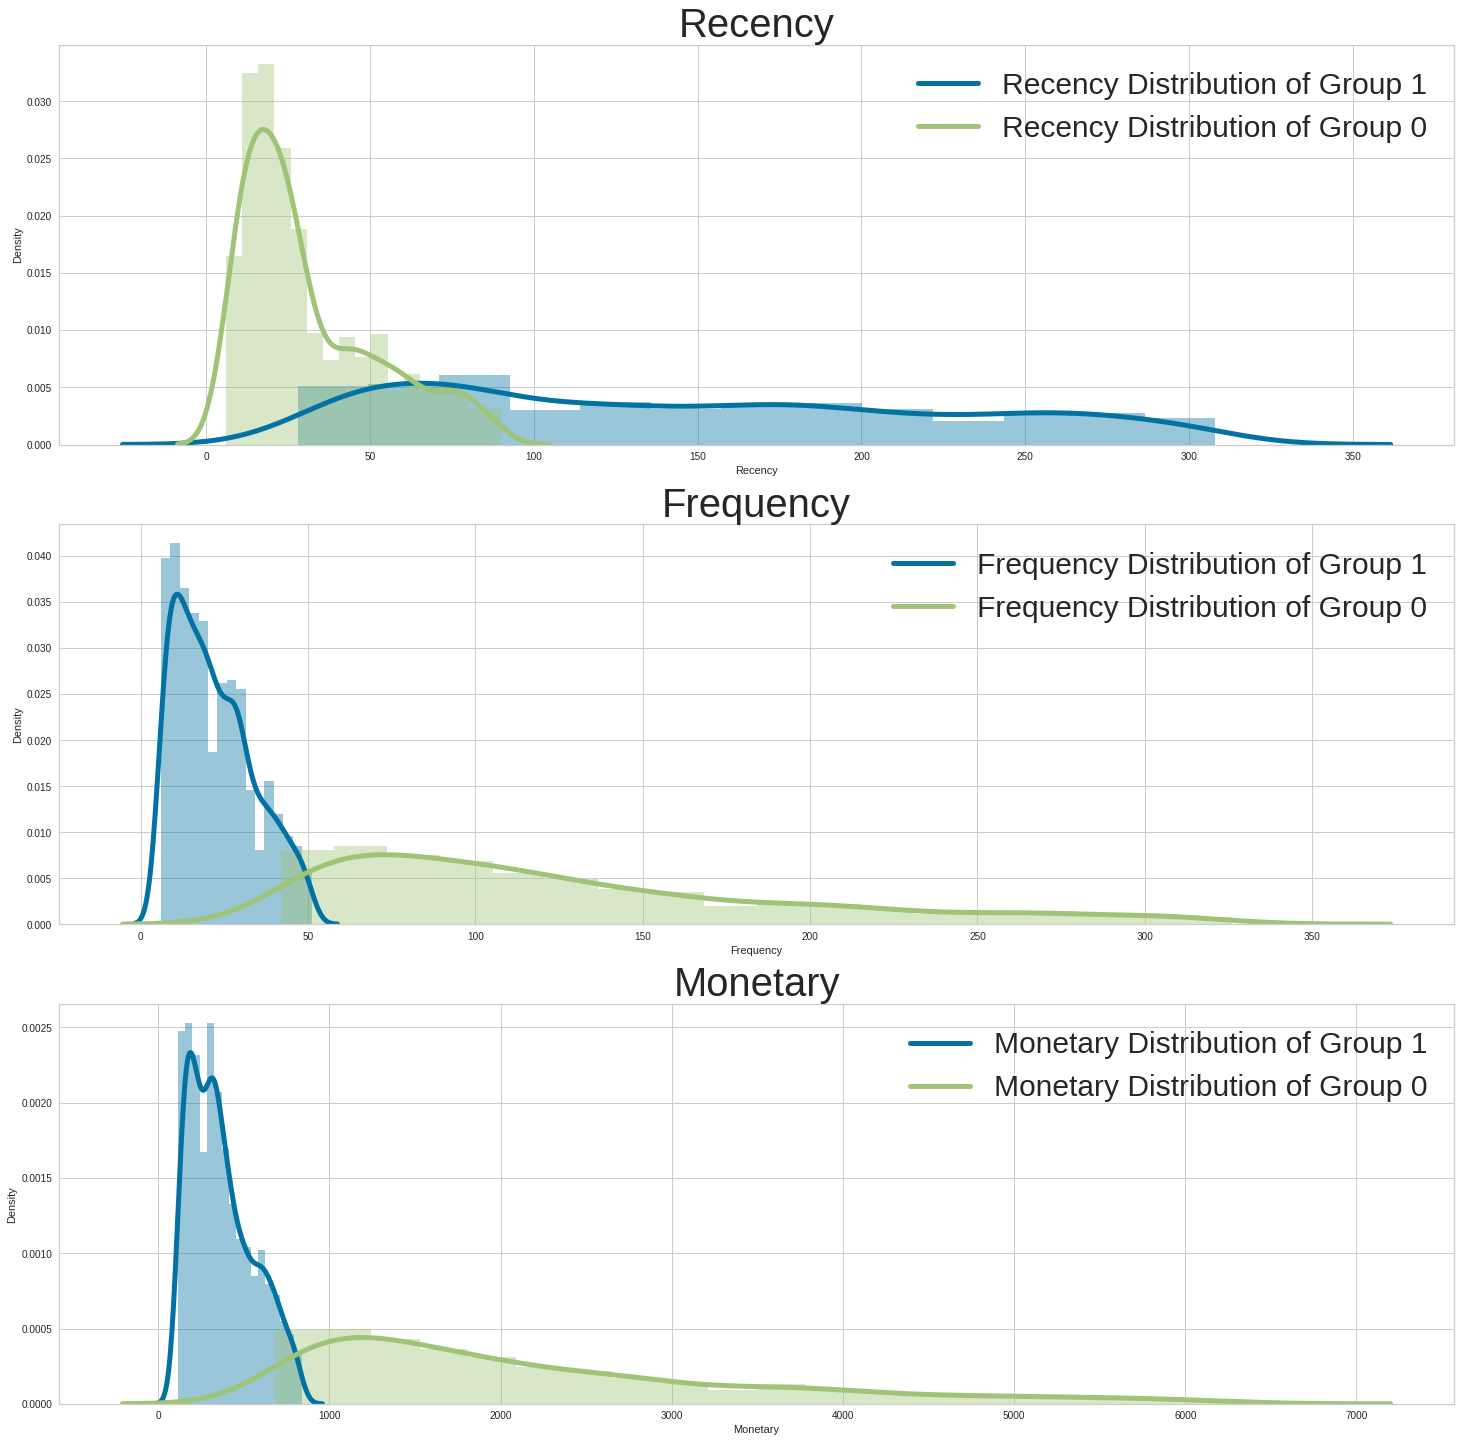

Visited                  Brought  \
K-Means|2Cluster                                                         
0                  Visited 12 to 52  days ago  Bought 65 to 190  Times   
1                 Visited 61 to 240  days ago   Bought 10 to 33  Times   

                                         Money Spent  
K-Means|2Cluster                                      
0                 Spent Around 1057 to 3340 Sterling  
1                   Spent Around 187 to 558 Sterling

In [55]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2)                                                  # Setting 2 Clusters
y_kmc = kmc.fit_predict(X)                                                  # FItting the model
centers = kmc.cluster_centers_                                              # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'                      # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|2Cluster']=plotc(y_kmc,title,'K-Means|2Cluster',0.1)

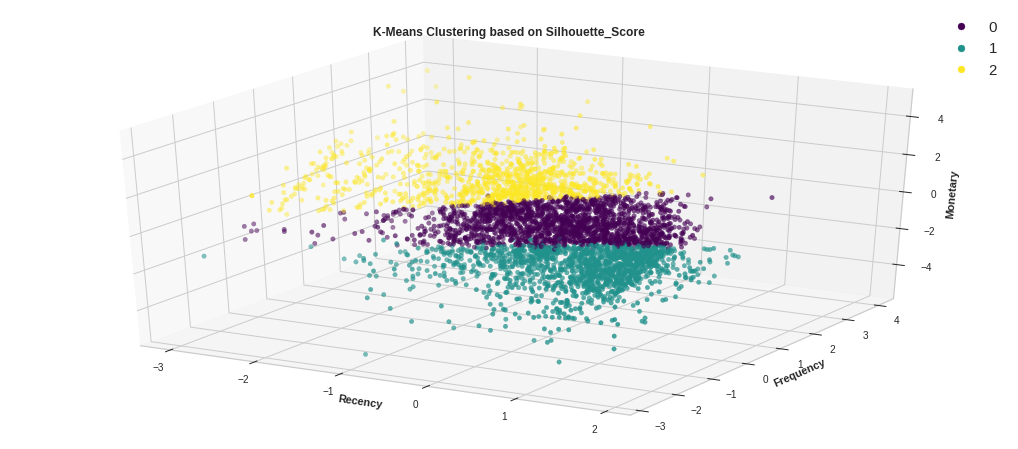

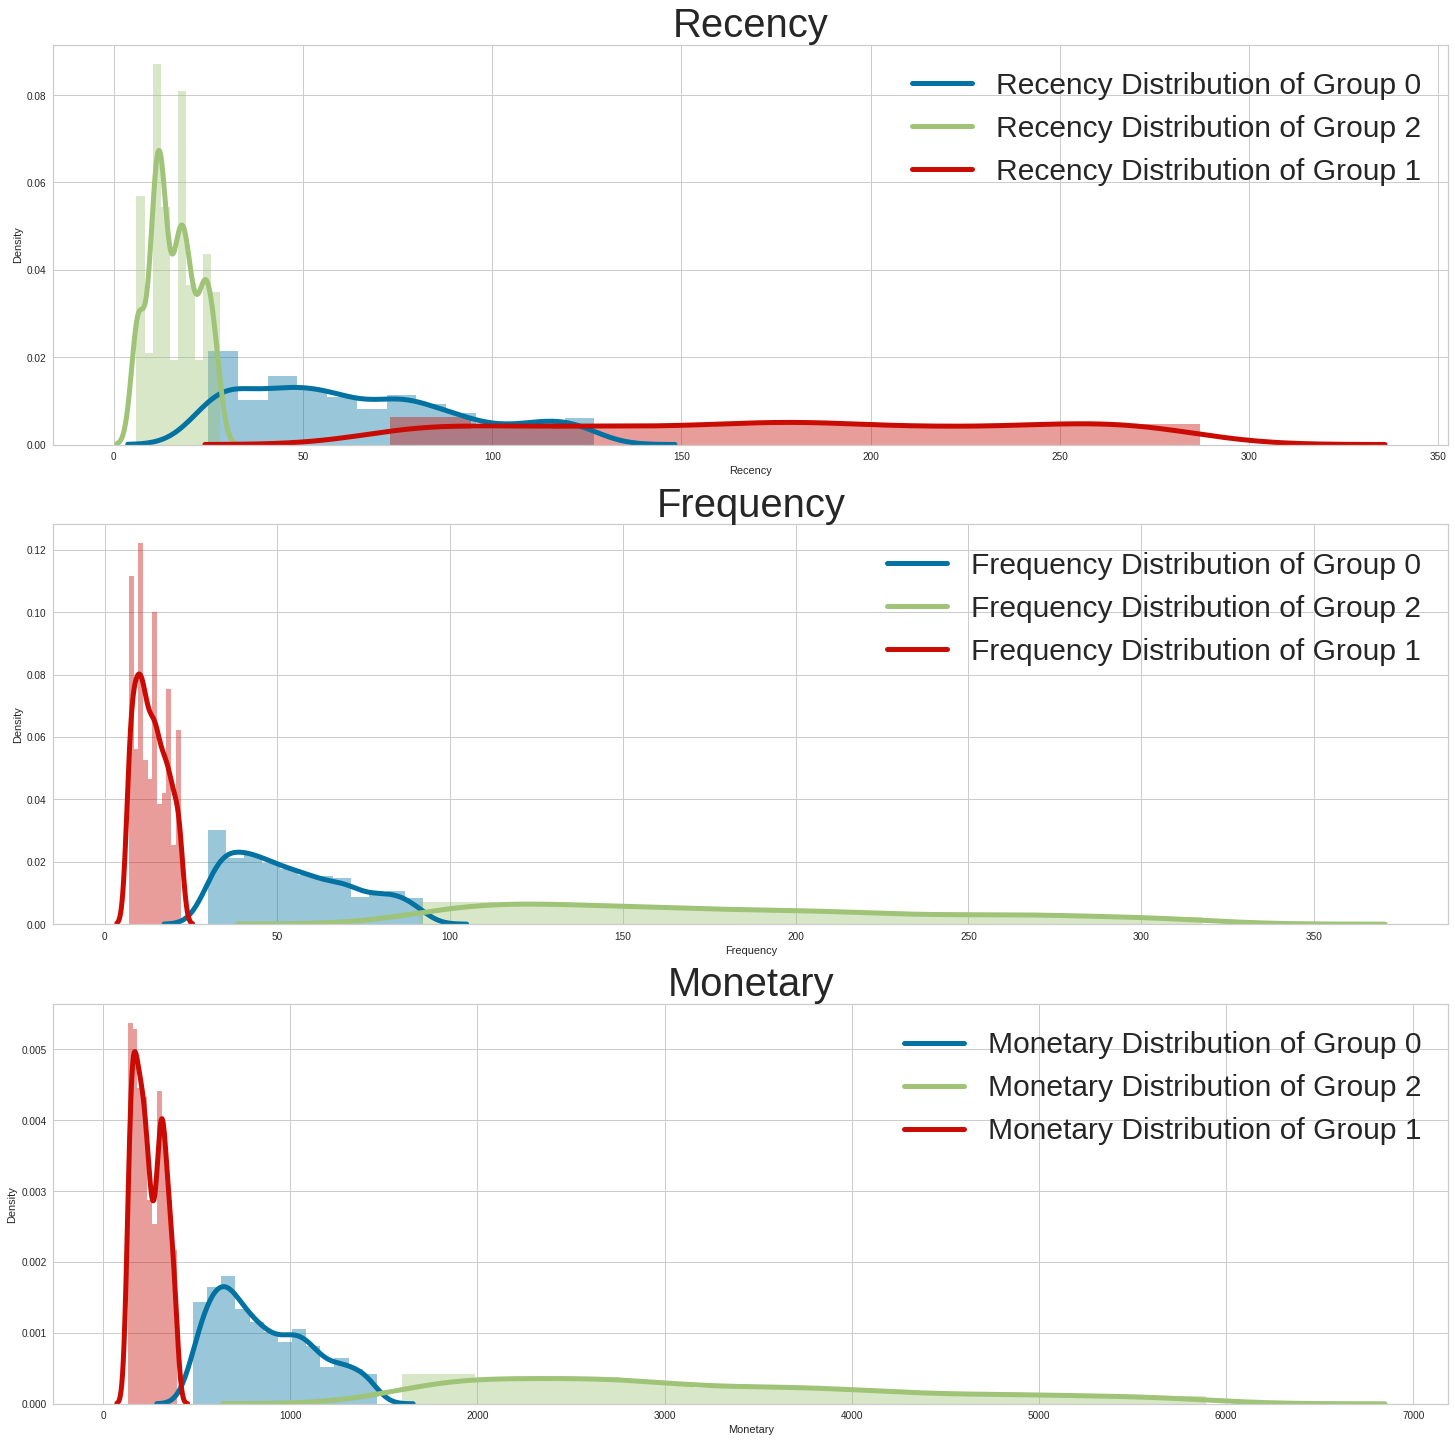

Visited                   Brought  \
K-Means|3Cluster                                                          
0                 Visited 27 to 114  days ago    Bought 33 to 83  Times   
1                 Visited 82 to 268  days ago     Bought 7 to 21  Times   
2                   Visited 6 to 25  days ago  Bought 102 to 282  Times   

                                         Money Spent  
K-Means|3Cluster                                      
0                  Spent Around 538 to 1290 Sterling  
1                   Spent Around 147 to 357 Sterling  
2                 Spent Around 1816 to 5101 Sterling

In [56]:
# Fitting the model on n_clusters = 3 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=3)                                                      # Setting 3 Clusters
y_kmc = kmc.fit_predict(X)                                                      # Fitting the model
centers = kmc.cluster_centers_                                                  # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'                          # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|3Cluster']=plotc(y_kmc,title,'K-Means|3Cluster',0.2)

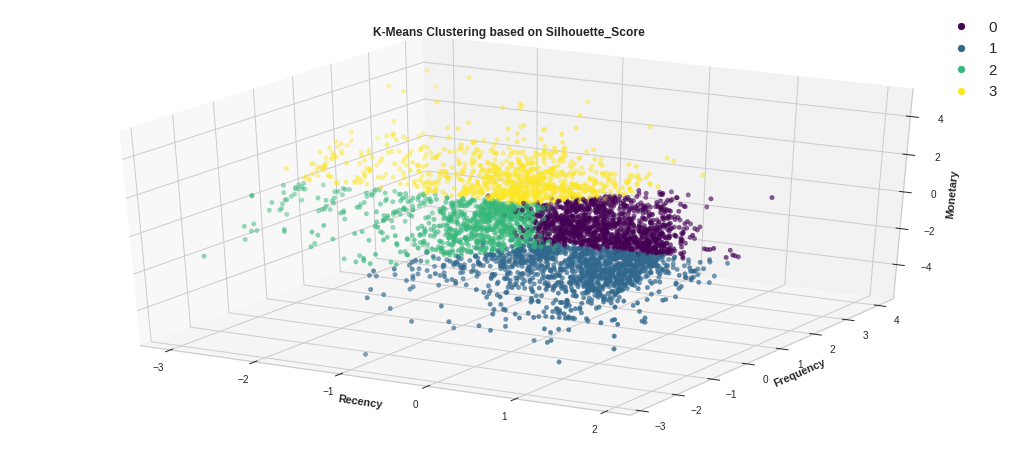

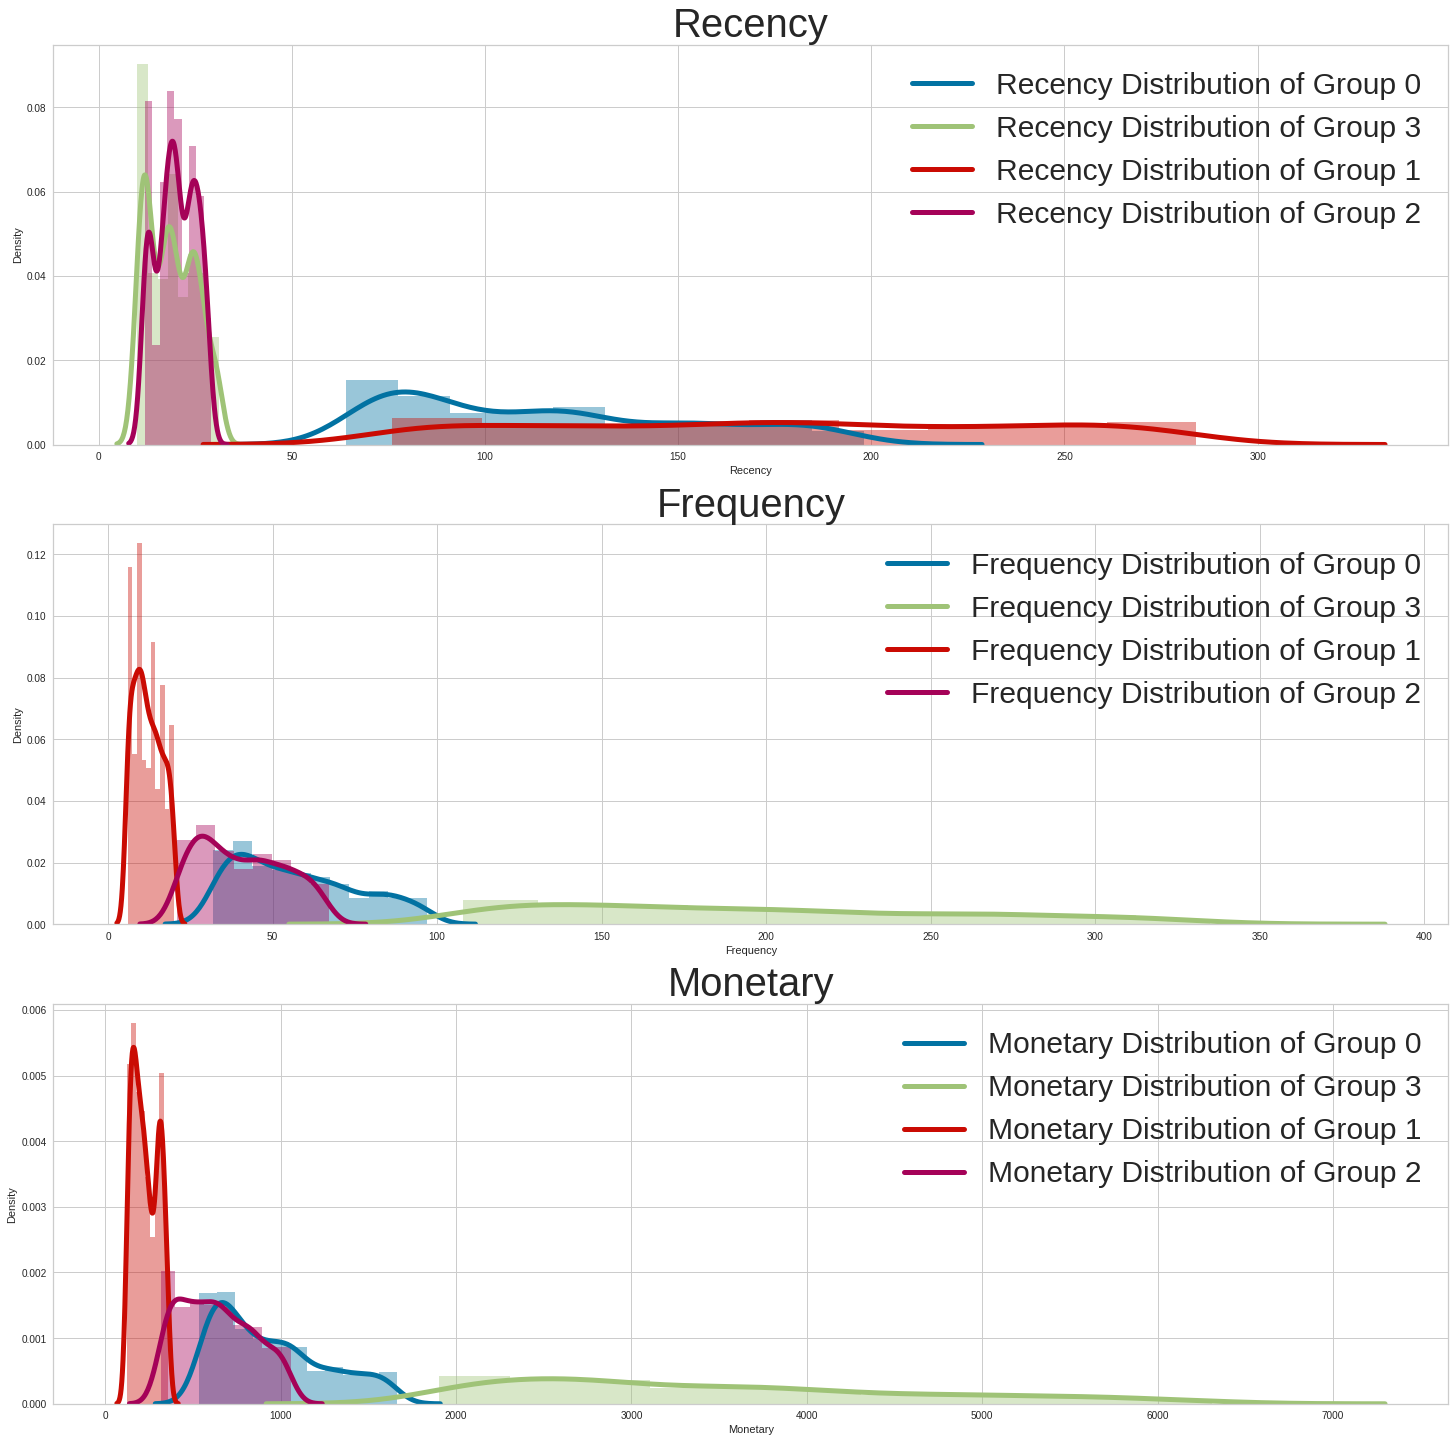

Visited                   Brought  \
K-Means|4Cluster                                                          
0                 Visited 70 to 181  days ago    Bought 35 to 88  Times   
1                 Visited 86 to 266  days ago     Bought 6 to 19  Times   
2                  Visited 13 to 28  days ago    Bought 22 to 61  Times   
3                  Visited 10 to 28  days ago  Bought 117 to 296  Times   

                                         Money Spent  
K-Means|4Cluster                                      
0                  Spent Around 588 to 1483 Sterling  
1                   Spent Around 137 to 331 Sterling  
2                   Spent Around 355 to 970 Sterling  
3                 Spent Around 2076 to 5451 Sterling

In [57]:
# Fitting the model on n_clusters = 4 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4)                                                  # Setting 4 Clusters
y_kmc = kmc.fit_predict(X)                                                  # FItting the model
centers = kmc.cluster_centers_                                              # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'                      # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|4Cluster']=plotc(y_kmc,title,'K-Means|4Cluster',0.2)

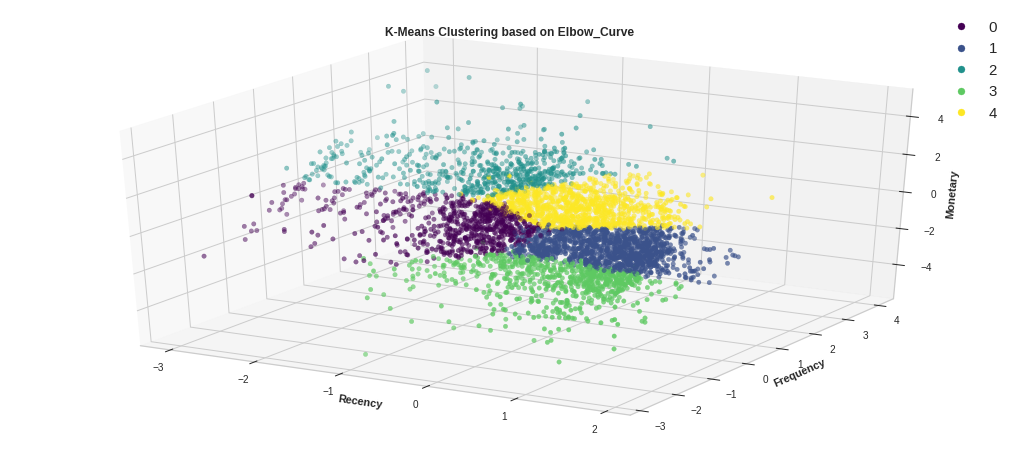

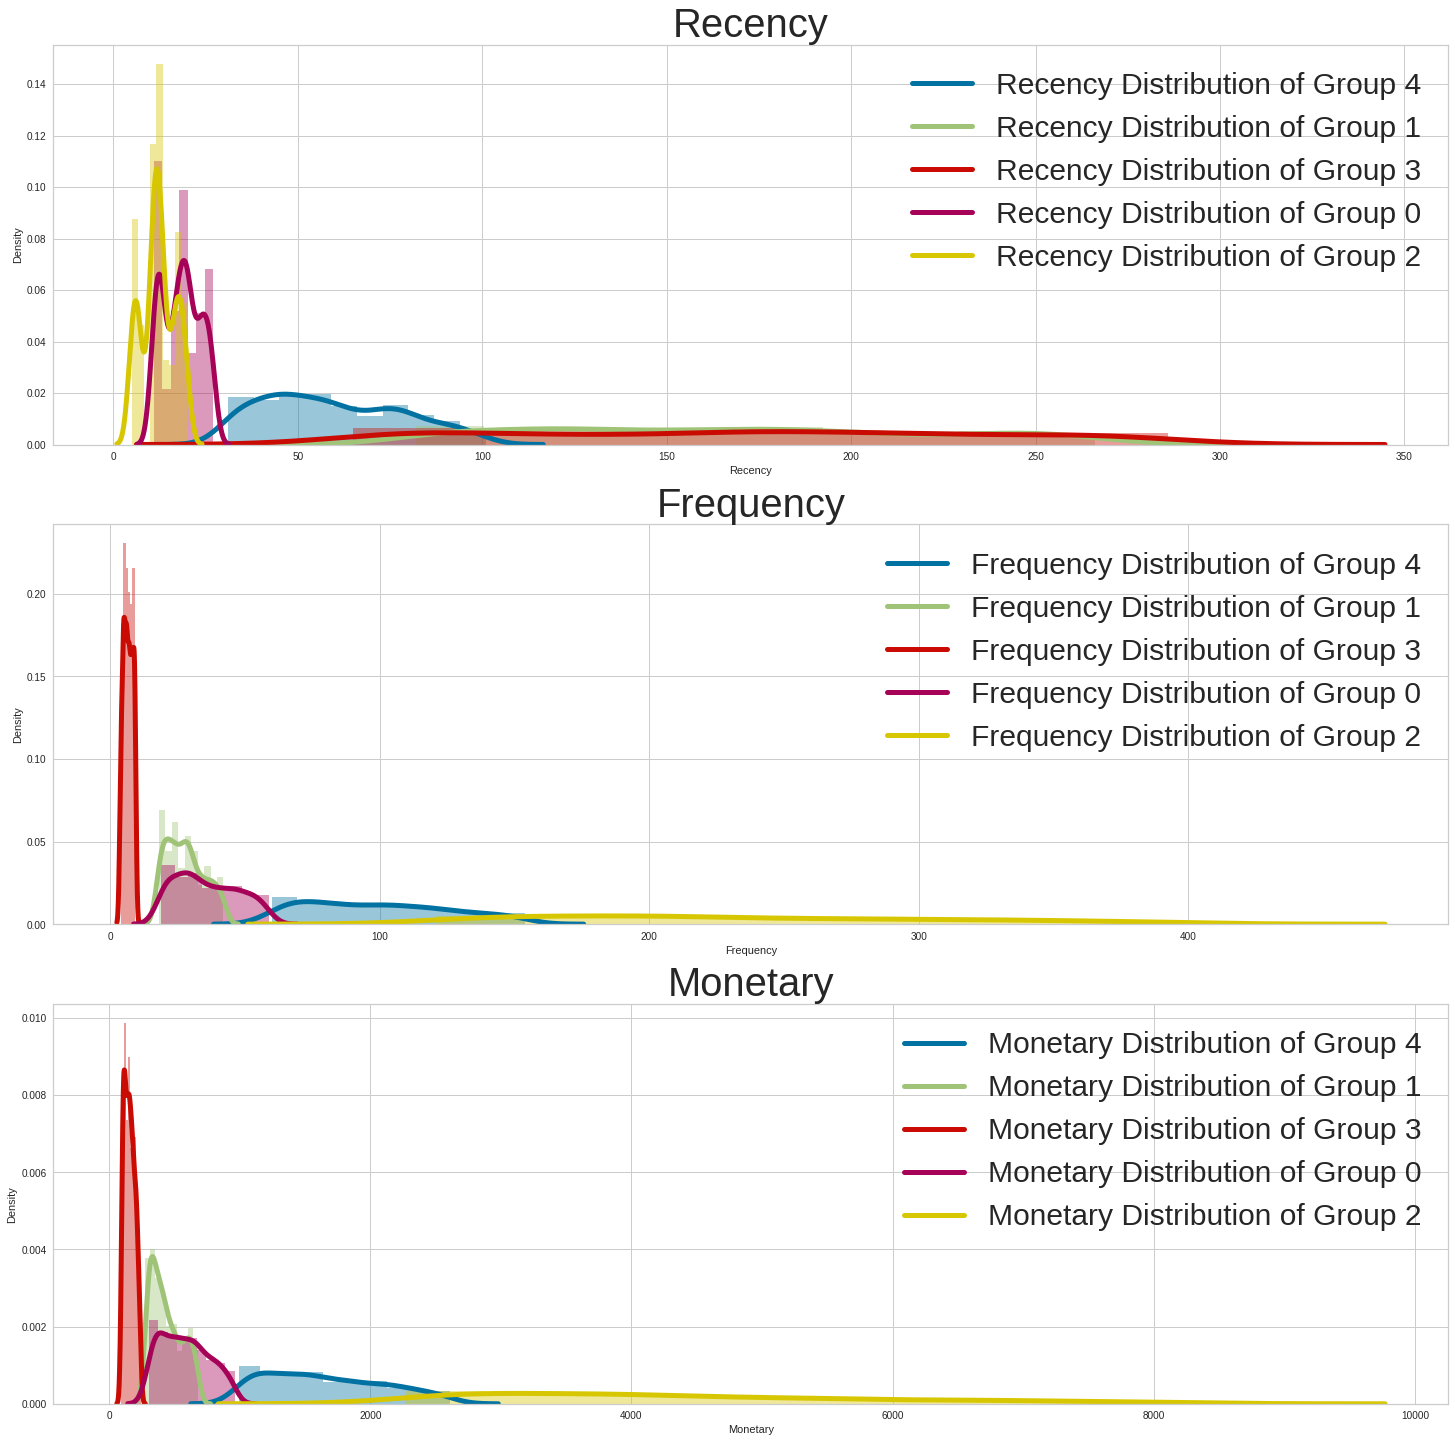

Visited                   Brought  \
K-Means|5Cluster                                                          
0                  Visited 12 to 26  days ago    Bought 20 to 54  Times   
1                 Visited 91 to 252  days ago    Bought 19 to 39  Times   
2                   Visited 5 to 19  days ago  Bought 138 to 354  Times   
3                 Visited 75 to 266  days ago     Bought 4 to 10  Times   
4                  Visited 32 to 89  days ago   Bought 65 to 141  Times   

                                         Money Spent  
K-Means|5Cluster                                      
0                   Spent Around 336 to 859 Sterling  
1                   Spent Around 300 to 630 Sterling  
2                 Spent Around 2552 to 6911 Sterling  
3                   Spent Around 104 to 216 Sterling  
4                 Spent Around 1071 to 2355 Sterling

In [58]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5)                                                  # Setting 5 Clusters
y_kmc = kmc.fit_predict(X)                                                  # FItting the model
centers = kmc.cluster_centers_                                              # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'                      # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|5Cluster']=plotc(y_kmc,title,'K-Means|5Cluster',0.2)

## Heirarchical Clustering 

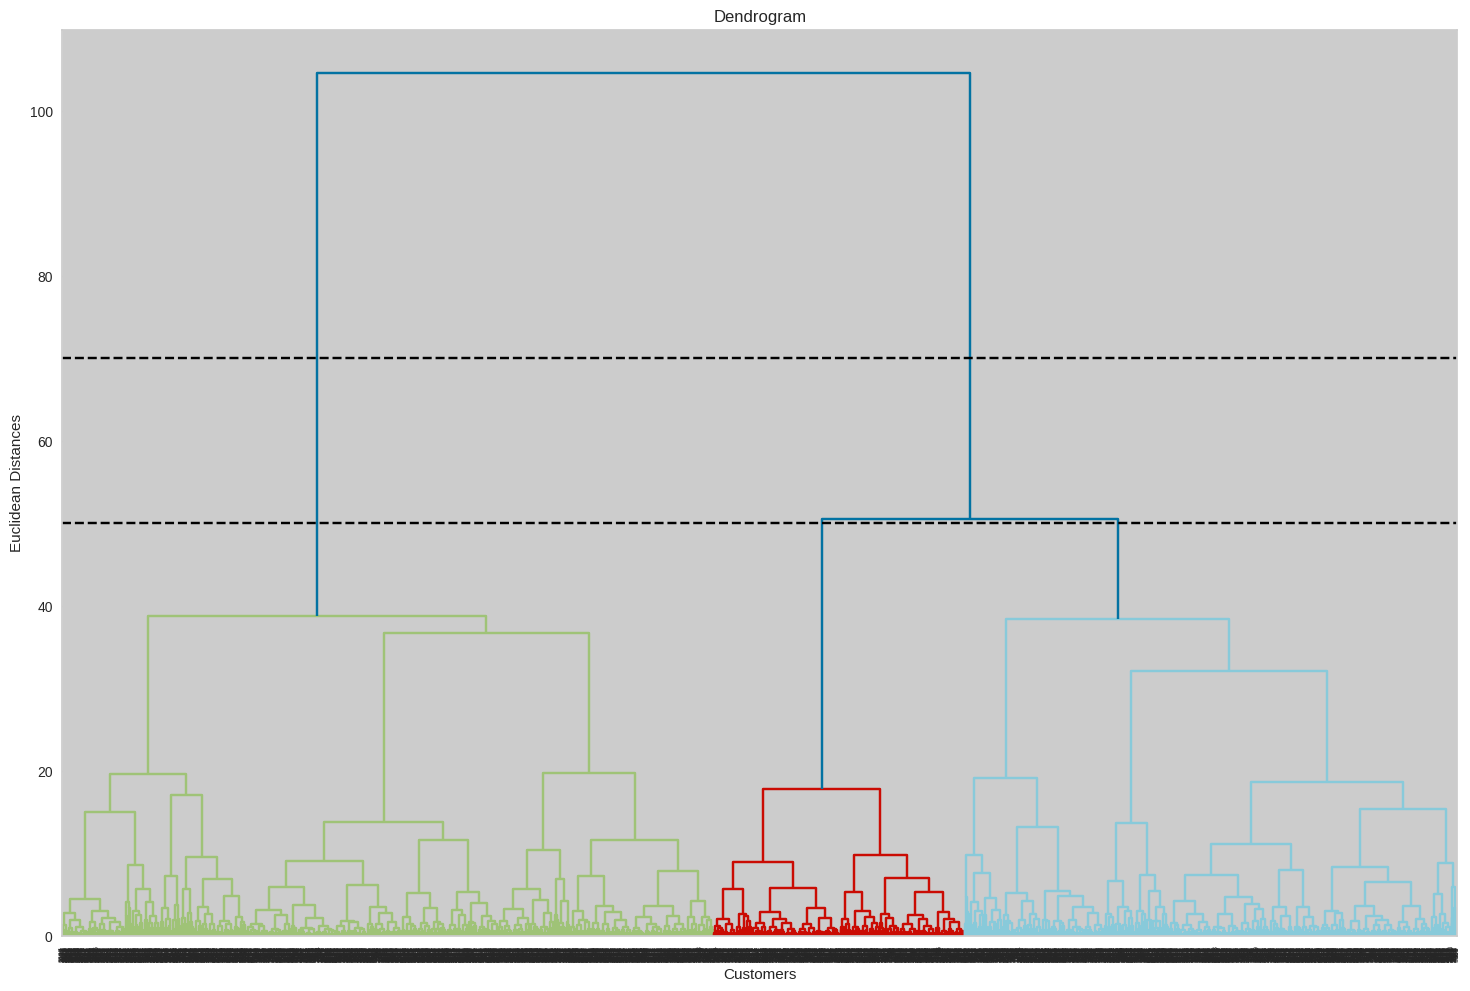

In [59]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(18,12), dpi=100)                        # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

Interpretation:
1. We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.
2. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

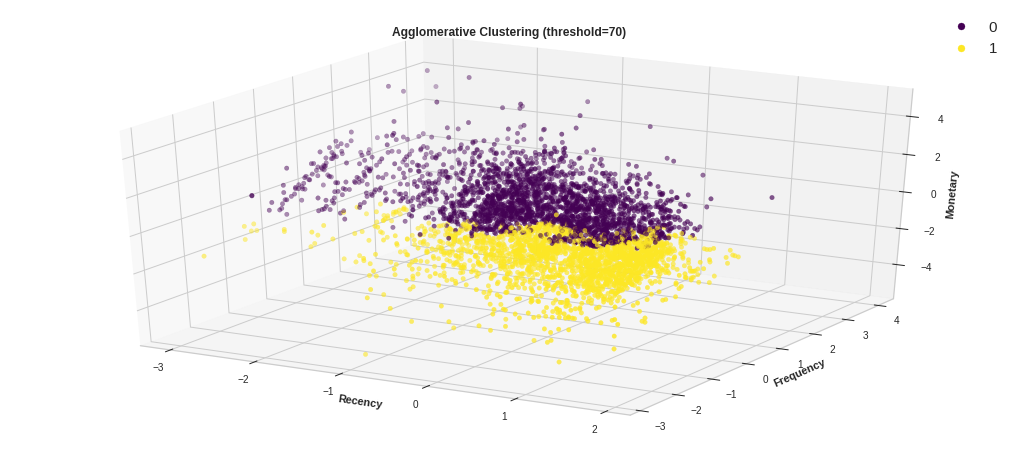

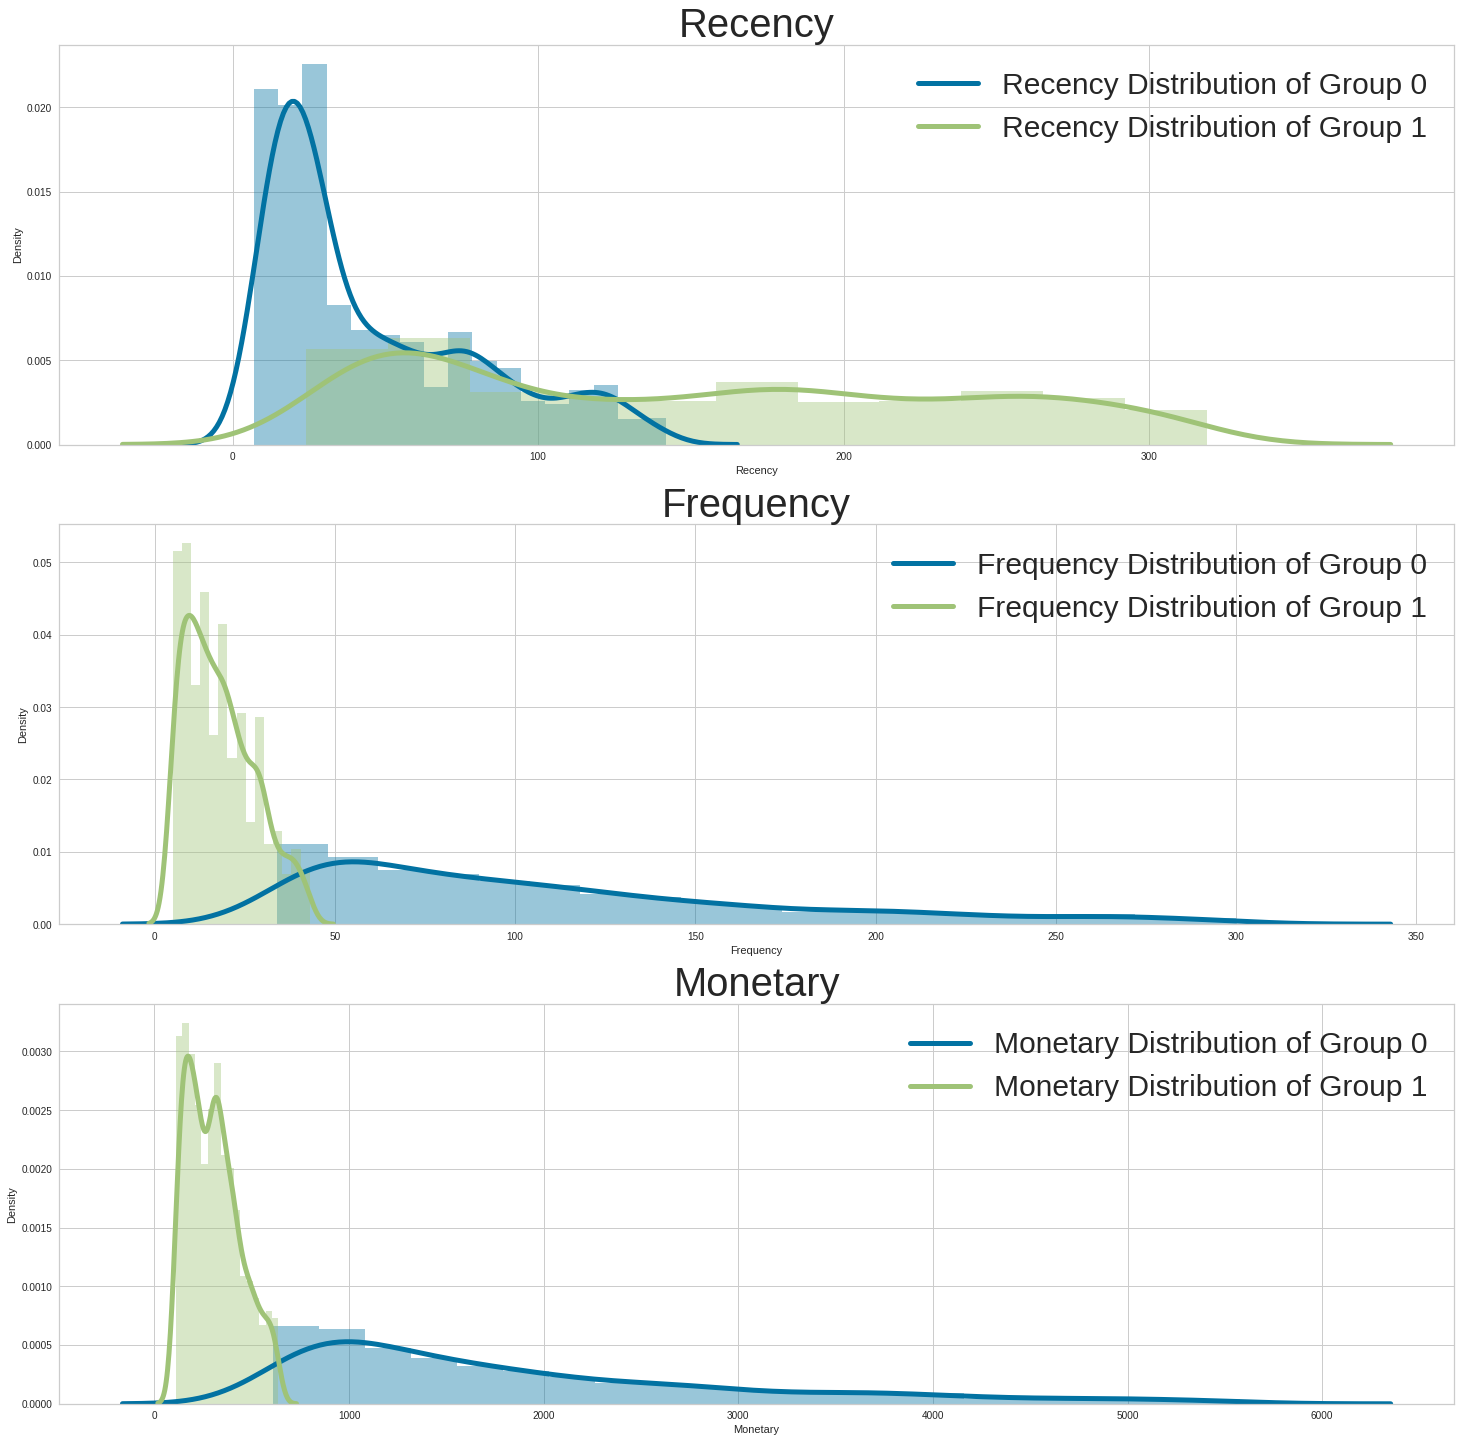

Visited                  Brought  \
hierarchical|2Cluster                                                         
0                       Visited 16 to 79  days ago  Bought 50 to 165  Times   
1                      Visited 54 to 245  days ago    Bought 9 to 28  Times   

                                             Money Spent  
hierarchical|2Cluster                                     
0                      Spent Around 887 to 2861 Sterling  
1                       Spent Around 168 to 427 Sterling

In [60]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # Initializing the model
y_ahc = ahc.fit_predict(X)                                                        # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                 # Setting the model

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['hierarchical|2Cluster']=plotc(y_ahc,title,'hierarchical|2Cluster',0.1)

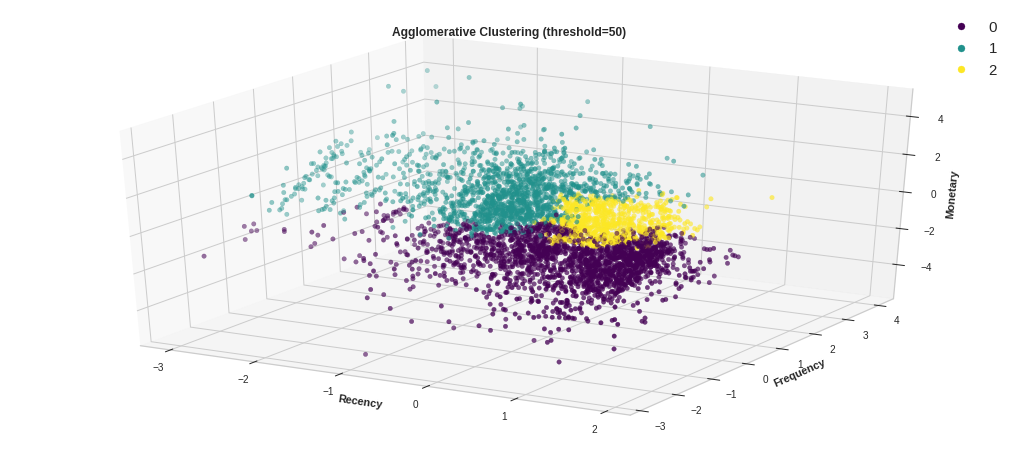

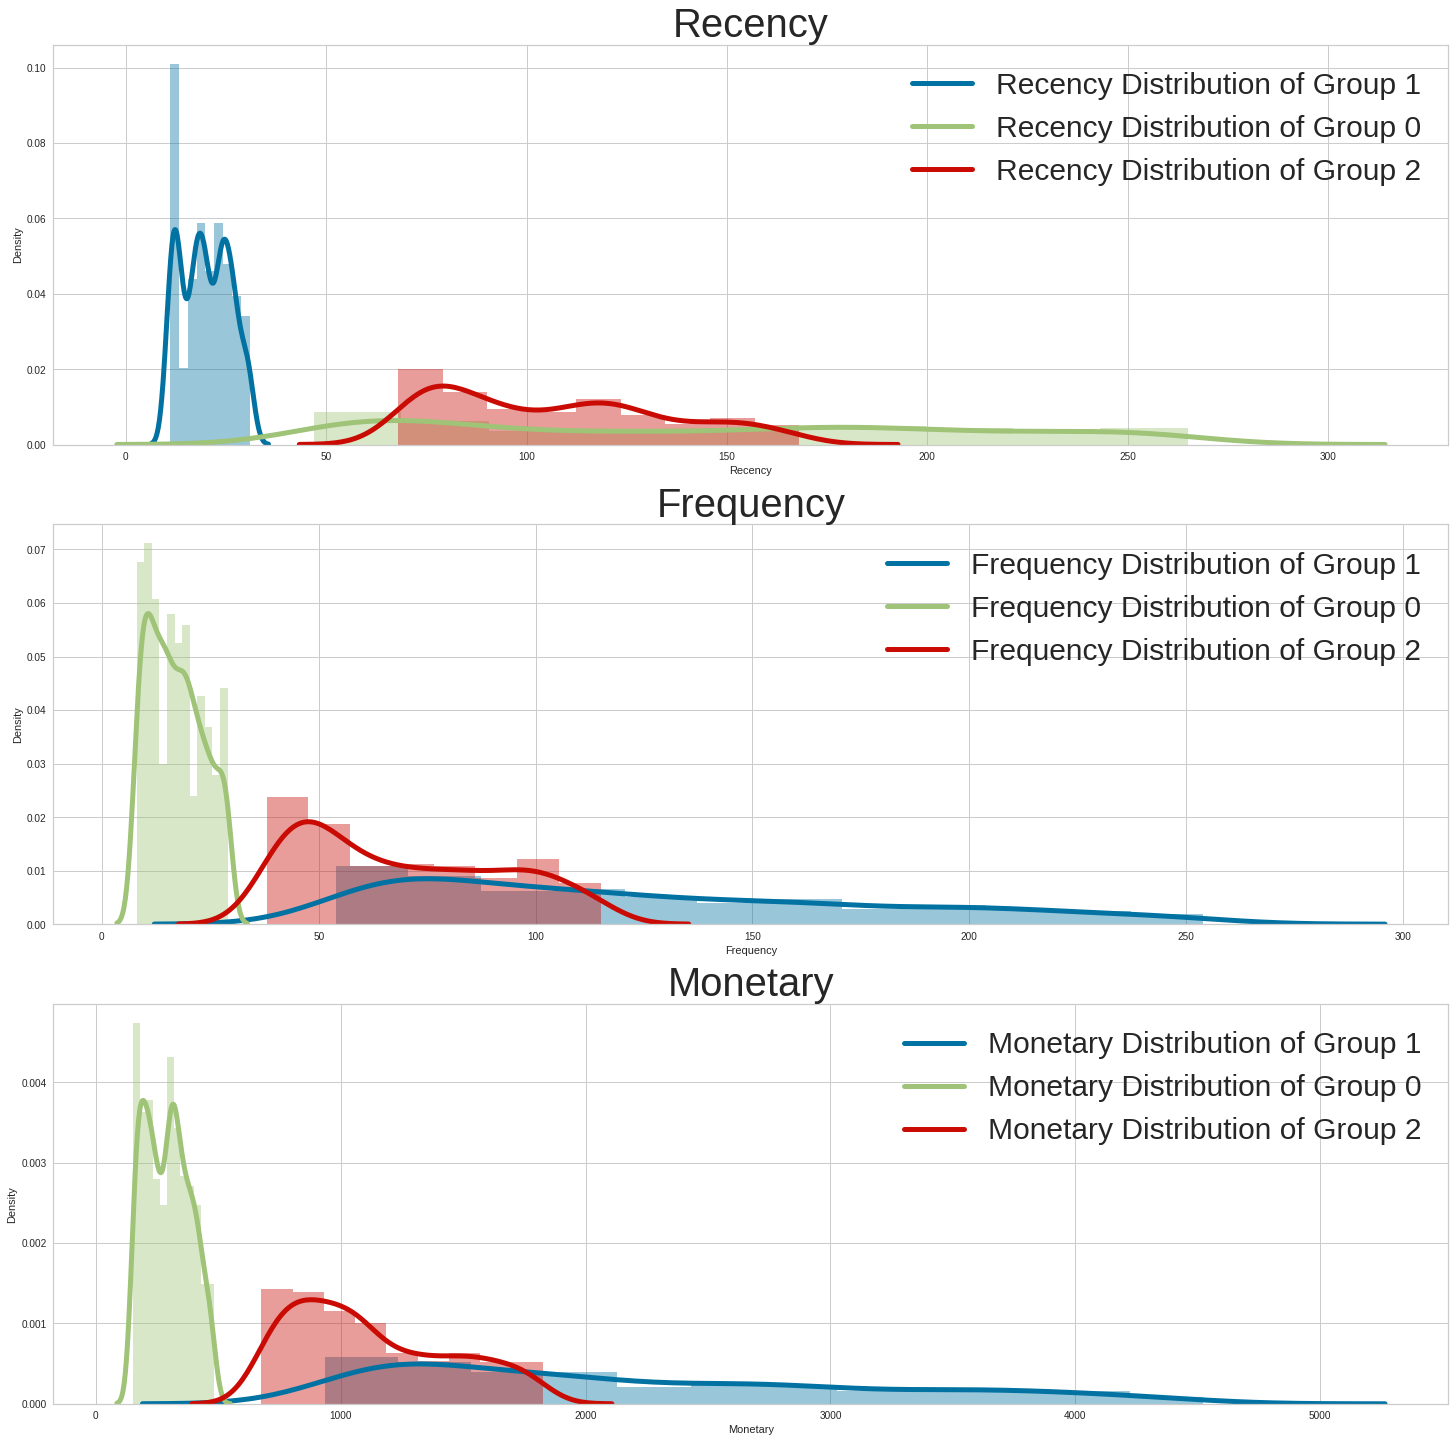

Visited                  Brought  \
hierarchical|3Cluster                                                         
0                      Visited 54 to 245  days ago    Bought 9 to 28  Times   
1                       Visited 11 to 30  days ago  Bought 60 to 215  Times   
2                      Visited 73 to 153  days ago  Bought 41 to 105  Times   

                                              Money Spent  
hierarchical|3Cluster                                      
0                        Spent Around 168 to 427 Sterling  
1                      Spent Around 1074 to 3807 Sterling  
2                       Spent Around 729 to 1661 Sterling

In [61]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')   # Initializing model with 3 clusters
y_ahc = ahc.fit_predict(X))                                                        # FItting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                   # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['hierarchical|3Cluster']=plotc(y_ahc,title,'hierarchical|3Cluster',0.2)  

# DBSCAN Clustering 

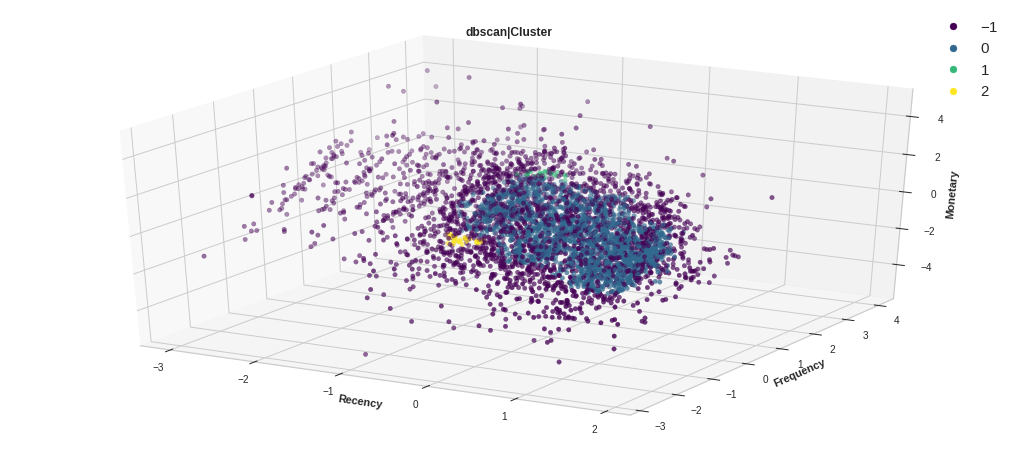

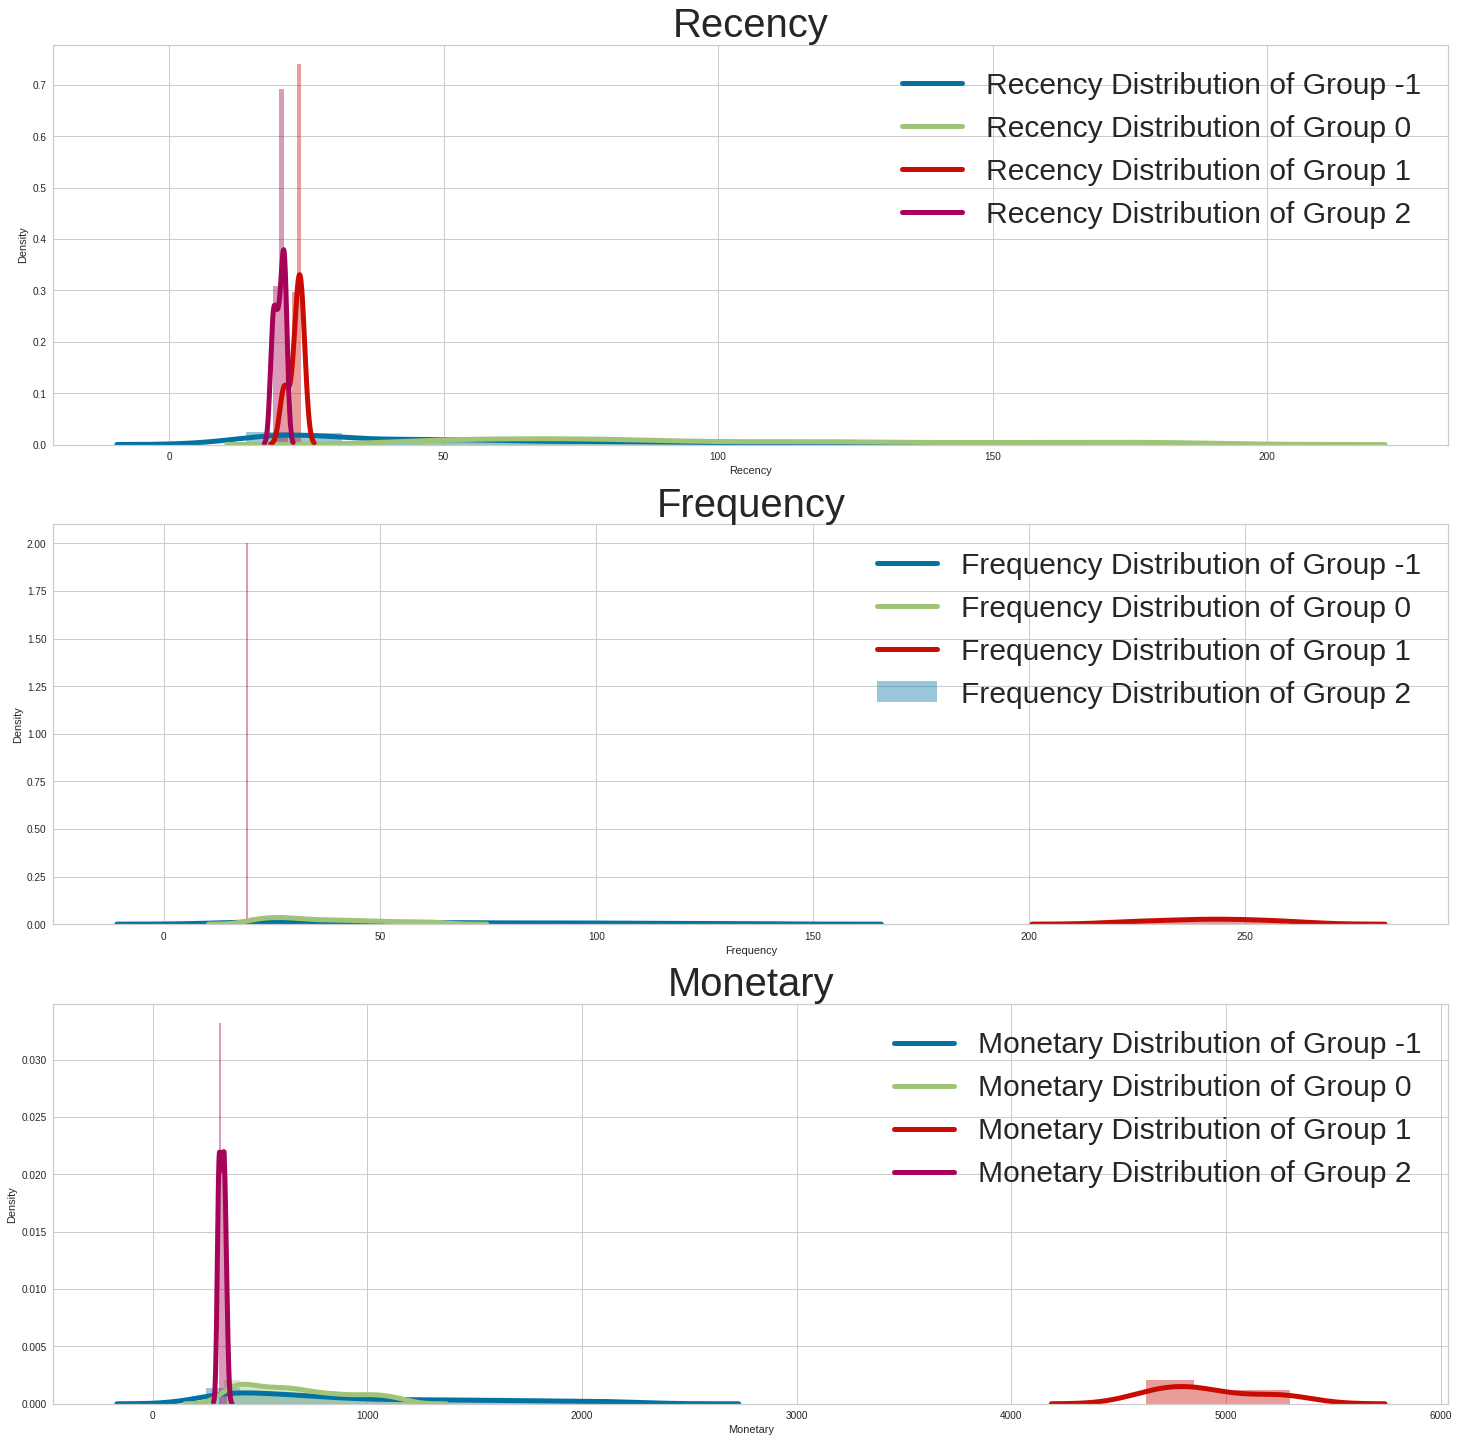

Visited  \
RFM Quantile Based Segmentation                                
-1                               Visited 13 to 129  days ago   
 0                               Visited 42 to 190  days ago   
 1                                Visited 19 to 25  days ago   
 2                                Visited 18 to 24  days ago   

                                                  Brought  \
RFM Quantile Based Segmentation                             
-1                                Bought 14 to 141  Times   
 0                                 Bought 19 to 66  Times   
 1                               Bought 222 to 265  Times   
 2                                 Bought 18 to 20  Times   

                                                        Money Spent  
RFM Quantile Based Segmentation                                      
-1                                Spent Around 247 to 2317 Sterling  
 0                                Spent Around 331 to 1186 Sterling  
 1                               Spent Around 4544 to 5417 Sterling  
 2                                 Spent Around 306 to 345 Sterling

In [107]:

# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.25, min_samples=30)              #
y = dbsc.fit_predict(X)                             # Fitting the model

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['dbscan|Cluster'] = plotc(y, 'dbscan|Cluster', title, 0.25)

# Conclusion


## 1.   Binning_Segment_ (4 Clusters)
## 2.   QuantileCut________(4 Clusters)
## 3.   K-Means___________(2Cluster)
## 4.   K-Means___________(3Cluster)
## 5.   K-Means___________(4Cluster)
## 6.   K-Means___________(5Cluster)
## 7.   hierarchical________(2Cluster)
## 8.   hierarchical________(5Cluster)**bold text**

# NOTE ALL THE VALUES SHOWN ARE APPROX!!
# **VALUES MIN AND MAX ARE TAKEN FROM 25th PERCENTILE and 75th PERCENTILE OF FEATURES RESPECTIVELY** 


1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering .
3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the  algorithms and the statistics extracted from the data.
4. Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.




# 1. Binning_Segment_ (4 Clusters)

In [112]:

def printmd(string):
  '''
  col String : Type: String
  returns :MARKDOWN
  This functions allows us to print the output in the form of MarkDown 
  '''
  display(Markdown(string))

# Setting List of 5 types of customers based on activities of the customer
customers_type=["**LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌",
                '**AVERAGE CUSTOMERS**  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉',
                '**RECENTLY VISITED AVERAGE CUSTOMERS** ❤❤❤❤❤❤❤❤❤❤',
                '**GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈',
                '**BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓'
                ]

In [135]:
def printing_conclusion(dataframe,customer_type_order,segment_name):
  '''
  dataframe:dataframe that has conclusion of customers
  customer_type_order:List with order of stars given to customer to define customer type TYPE:list
  segment_name:Name of the clusters being passed TYPE:String
  Returns Conclusion of grouped customer based on clustering algorithm
  Features This functions returns the Conclusion of the grouped customers segmented from clustering algorithm 
  '''
  print(70*"__") 
  print(70*"__")
  # Iterating for loop over all the segments
  for id,i in enumerate(dataframe.index):
    print("")
    printmd(f""" <font size="4"> **{segment_name} {i}:** Customers Visited Stores **around {dataframe.loc[i,'Visited']}** 
          and **{dataframe.loc[i,'Brought']}** and 
           **{dataframe.loc[i,'Money Spent']}**</font> <br><font size=6> {customers_type[customer_type_order[id]]} <br></font>""")
    print(70*"__")
    print(70*"__")

In [136]:

# from IPython.display import Markdown, display
display(conclusion['Binning_Segment_'][1])

#Manually Rating stars for the groups of customer 
customer_type_order=[0,1,3,4]
# Storing the conclusion data frame into variable 
dataframe=conclusion['Binning_Segment_'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,"Binning Segment")

Visited                   Brought  \
Binning_Segment_                                                           
1                 Visited 114 to 279  days ago     Bought 7 to 21  Times   
2                  Visited 40 to 154  days ago    Bought 19 to 42  Times   
3                   Visited 19 to 79  days ago    Bought 45 to 99  Times   
4                   Visited 10 to 25  days ago  Bought 121 to 301  Times   

                                         Money Spent  
Binning_Segment_                                      
1                   Spent Around 141 to 330 Sterling  
2                   Spent Around 329 to 708 Sterling  
3                  Spent Around 732 to 1623 Sterling  
4                 Spent Around 2096 to 5396 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **Binning Segment 1:** Customers Visited Stores **around Visited 114 to 279  days ago** 
          and **Bought 7 to 21  Times** and 
           **Spent Around 141 to 330 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **Binning Segment 2:** Customers Visited Stores **around Visited 40 to 154  days ago** 
          and **Bought 19 to 42  Times** and 
           **Spent Around 329 to 708 Sterling**</font> <br><font size=6> **AVERAGE CUSTOMERS**  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **Binning Segment 3:** Customers Visited Stores **around Visited 19 to 79  days ago** 
          and **Bought 45 to 99  Times** and 
           **Spent Around 732 to 1623 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **Binning Segment 4:** Customers Visited Stores **around Visited 10 to 25  days ago** 
          and **Bought 121 to 301  Times** and 
           **Spent Around 2096 to 5396 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 2. QuantileCut________(4 Clusters)

In [138]:
# Displaying the conclusion in dataframe
display(conclusion['QuantileCut'][1])

#Manually Rating stars for the groups of customer 
customer_type_order=[0,1,3,4]

# Storing the conclusion data frame into variable 
dataframe=conclusion['QuantileCut'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,"QuantileCut")

Visited  \
RFM Quantile Based Segmentation                                 
1                                Visited 200 to 303  days ago   
2                                 Visited 74 to 122  days ago   
3                                  Visited 27 to 51  days ago   
4                                   Visited 6 to 18  days ago   

                                                 Brought  \
RFM Quantile Based Segmentation                            
1                                  Bought 9 to 37  Times   
2                                 Bought 12 to 63  Times   
3                                Bought 28 to 128  Times   
4                                Bought 47 to 202  Times   

                                                       Money Spent  
RFM Quantile Based Segmentation                                     
1                                 Spent Around 172 to 582 Sterling  
2                                Spent Around 240 to 1120 Sterling  
3                                Spent Around 463 to 2093 Sterling  
4                                Spent Around 778 to 3593 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **QuantileCut 1:** Customers Visited Stores **around Visited 200 to 303  days ago** 
          and **Bought 9 to 37  Times** and 
           **Spent Around 172 to 582 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **QuantileCut 2:** Customers Visited Stores **around Visited 74 to 122  days ago** 
          and **Bought 12 to 63  Times** and 
           **Spent Around 240 to 1120 Sterling**</font> <br><font size=6> **AVERAGE CUSTOMERS**  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **QuantileCut 3:** Customers Visited Stores **around Visited 27 to 51  days ago** 
          and **Bought 28 to 128  Times** and 
           **Spent Around 463 to 2093 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **QuantileCut 4:** Customers Visited Stores **around Visited 6 to 18  days ago** 
          and **Bought 47 to 202  Times** and 
           **Spent Around 778 to 3593 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 3. Conclusion for K-Means___________(2Cluster)

In [140]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|2Cluster'][1])

#Manually Rating stars for the groups of customer 
customer_type_order=[4,0]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|2Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,"K-Means|2Cluster")

Visited                  Brought  \
K-Means|2Cluster                                                         
0                  Visited 12 to 52  days ago  Bought 65 to 190  Times   
1                 Visited 61 to 240  days ago   Bought 10 to 33  Times   

                                         Money Spent  
K-Means|2Cluster                                      
0                 Spent Around 1057 to 3340 Sterling  
1                   Spent Around 187 to 558 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|2Cluster 0:** Customers Visited Stores **around Visited 12 to 52  days ago** 
          and **Bought 65 to 190  Times** and 
           **Spent Around 1057 to 3340 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|2Cluster 1:** Customers Visited Stores **around Visited 61 to 240  days ago** 
          and **Bought 10 to 33  Times** and 
           **Spent Around 187 to 558 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 4. Conclusion K-Means___________(3Cluster)

In [141]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|3Cluster'][1])

#Manually Rating stars for the groups of customer 
customer_type_order=[3,0,4]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|3Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,"K-Means|3Cluster")

Visited                   Brought  \
K-Means|3Cluster                                                          
0                 Visited 27 to 114  days ago    Bought 33 to 83  Times   
1                 Visited 82 to 268  days ago     Bought 7 to 21  Times   
2                   Visited 6 to 25  days ago  Bought 102 to 282  Times   

                                         Money Spent  
K-Means|3Cluster                                      
0                  Spent Around 538 to 1290 Sterling  
1                   Spent Around 147 to 357 Sterling  
2                 Spent Around 1816 to 5101 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|3Cluster 0:** Customers Visited Stores **around Visited 27 to 114  days ago** 
          and **Bought 33 to 83  Times** and 
           **Spent Around 538 to 1290 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|3Cluster 1:** Customers Visited Stores **around Visited 82 to 268  days ago** 
          and **Bought 7 to 21  Times** and 
           **Spent Around 147 to 357 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|3Cluster 2:** Customers Visited Stores **around Visited 6 to 25  days ago** 
          and **Bought 102 to 282  Times** and 
           **Spent Around 1816 to 5101 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 5. Conclusion K-Means___________(4 Cluster)

In [142]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|4Cluster'][1])

#Manually Rating stars for the groups of customer 
customer_type_order=[3,0,2,4]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|4Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,"K-Means|4Cluster")


Visited                   Brought  \
K-Means|4Cluster                                                          
0                 Visited 70 to 181  days ago    Bought 35 to 88  Times   
1                 Visited 86 to 266  days ago     Bought 6 to 19  Times   
2                  Visited 13 to 28  days ago    Bought 22 to 61  Times   
3                  Visited 10 to 28  days ago  Bought 117 to 296  Times   

                                         Money Spent  
K-Means|4Cluster                                      
0                  Spent Around 588 to 1483 Sterling  
1                   Spent Around 137 to 331 Sterling  
2                   Spent Around 355 to 970 Sterling  
3                 Spent Around 2076 to 5451 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|4Cluster 0:** Customers Visited Stores **around Visited 70 to 181  days ago** 
          and **Bought 35 to 88  Times** and 
           **Spent Around 588 to 1483 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|4Cluster 1:** Customers Visited Stores **around Visited 86 to 266  days ago** 
          and **Bought 6 to 19  Times** and 
           **Spent Around 137 to 331 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|4Cluster 2:** Customers Visited Stores **around Visited 13 to 28  days ago** 
          and **Bought 22 to 61  Times** and 
           **Spent Around 355 to 970 Sterling**</font> <br><font size=6> **RECENTLY VISITED AVERAGE CUSTOMERS** ❤❤❤❤❤❤❤❤❤❤ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|4Cluster 3:** Customers Visited Stores **around Visited 10 to 28  days ago** 
          and **Bought 117 to 296  Times** and 
           **Spent Around 2076 to 5451 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 6. Conclusion K-Means___________(5 Cluster)

In [143]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|5Cluster'][1])

#Manually Rating stars for the groups of customer
customer_type_order=[2,1,4,0,3]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|5Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,"K-Means|5Cluster")

Visited                   Brought  \
K-Means|5Cluster                                                          
0                  Visited 12 to 26  days ago    Bought 20 to 54  Times   
1                 Visited 91 to 252  days ago    Bought 19 to 39  Times   
2                   Visited 5 to 19  days ago  Bought 138 to 354  Times   
3                 Visited 75 to 266  days ago     Bought 4 to 10  Times   
4                  Visited 32 to 89  days ago   Bought 65 to 141  Times   

                                         Money Spent  
K-Means|5Cluster                                      
0                   Spent Around 336 to 859 Sterling  
1                   Spent Around 300 to 630 Sterling  
2                 Spent Around 2552 to 6911 Sterling  
3                   Spent Around 104 to 216 Sterling  
4                 Spent Around 1071 to 2355 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|5Cluster 0:** Customers Visited Stores **around Visited 12 to 26  days ago** 
          and **Bought 20 to 54  Times** and 
           **Spent Around 336 to 859 Sterling**</font> <br><font size=6> **RECENTLY VISITED AVERAGE CUSTOMERS** ❤❤❤❤❤❤❤❤❤❤ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|5Cluster 1:** Customers Visited Stores **around Visited 91 to 252  days ago** 
          and **Bought 19 to 39  Times** and 
           **Spent Around 300 to 630 Sterling**</font> <br><font size=6> **AVERAGE CUSTOMERS**  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|5Cluster 2:** Customers Visited Stores **around Visited 5 to 19  days ago** 
          and **Bought 138 to 354  Times** and 
           **Spent Around 2552 to 6911 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|5Cluster 3:** Customers Visited Stores **around Visited 75 to 266  days ago** 
          and **Bought 4 to 10  Times** and 
           **Spent Around 104 to 216 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **K-Means|5Cluster 4:** Customers Visited Stores **around Visited 32 to 89  days ago** 
          and **Bought 65 to 141  Times** and 
           **Spent Around 1071 to 2355 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 7. Conclusion hierarchicals___________(2 Cluster)

In [120]:
# Displaying the conclusion in dataframe
display(conclusion['hierarchical|2Cluster'][1])

#Manually Rating stars for the groups of customer
customer_type_order=[4,0]

# Storing the conclusion data frame into variable 
dataframe=conclusion['hierarchical|2Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,'hierarchical|2Cluster')

Visited                  Brought  \
hierarchical|2Cluster                                                         
0                       Visited 16 to 79  days ago  Bought 50 to 165  Times   
1                      Visited 54 to 245  days ago    Bought 9 to 28  Times   

                                             Money Spent  
hierarchical|2Cluster                                     
0                      Spent Around 887 to 2861 Sterling  
1                       Spent Around 168 to 427 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **hierarchical|2Cluster 0:** Customers Visited Stores **around Visited 16 to 79  days ago** 
          and **Bought 50 to 165  Times** and 
           **Spent Around 887 to 2861 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **hierarchical|2Cluster 1:** Customers Visited Stores **around Visited 54 to 245  days ago** 
          and **Bought 9 to 28  Times** and 
           **Spent Around 168 to 427 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 8. Conclusion hierarchicals___________(3 Cluster)

In [121]:
# Displaying the conclusion in dataframe
display(conclusion['hierarchical|3Cluster'][1])

#Manually Rating stars for the groups of customer
customer_type_order=[0,4,3]

# Storing the conclusion data frame into variable 
dataframe=conclusion['hierarchical|3Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,'hierarchical|3Cluster')

Visited                  Brought  \
hierarchical|3Cluster                                                         
0                      Visited 54 to 245  days ago    Bought 9 to 28  Times   
1                       Visited 11 to 30  days ago  Bought 60 to 215  Times   
2                      Visited 73 to 153  days ago  Bought 41 to 105  Times   

                                              Money Spent  
hierarchical|3Cluster                                      
0                        Spent Around 168 to 427 Sterling  
1                      Spent Around 1074 to 3807 Sterling  
2                       Spent Around 729 to 1661 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **hierarchical|3Cluster 0:** Customers Visited Stores **around Visited 54 to 245  days ago** 
          and **Bought 9 to 28  Times** and 
           **Spent Around 168 to 427 Sterling**</font> <br><font size=6> **LOST CUSTOMERS** ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **hierarchical|3Cluster 1:** Customers Visited Stores **around Visited 11 to 30  days ago** 
          and **Bought 60 to 215  Times** and 
           **Spent Around 1074 to 3807 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **hierarchical|3Cluster 2:** Customers Visited Stores **around Visited 73 to 153  days ago** 
          and **Bought 41 to 105  Times** and 
           **Spent Around 729 to 1661 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 9. Conclusion DBSCAN Clustering  

In [122]:
# Displaying the conclusion in dataframe
display(conclusion['dbscan|Cluster'][1])

#Manually Rating stars for the groups of customer
customer_type_order=[3,1,4,2]

# Storing the conclusion data frame into variable 
dataframe=conclusion['dbscan|Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,customer_type_order,'dbscan|Cluster')

Visited  \
RFM Quantile Based Segmentation                                
-1                               Visited 13 to 129  days ago   
 0                               Visited 42 to 190  days ago   
 1                                Visited 19 to 25  days ago   
 2                                Visited 18 to 24  days ago   

                                                  Brought  \
RFM Quantile Based Segmentation                             
-1                                Bought 14 to 141  Times   
 0                                 Bought 19 to 66  Times   
 1                               Bought 222 to 265  Times   
 2                                 Bought 18 to 20  Times   

                                                        Money Spent  
RFM Quantile Based Segmentation                                      
-1                                Spent Around 247 to 2317 Sterling  
 0                                Spent Around 331 to 1186 Sterling  
 1                               Spent Around 4544 to 5417 Sterling  
 2                                 Spent Around 306 to 345 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **dbscan|Cluster -1:** Customers Visited Stores **around Visited 13 to 129  days ago** 
          and **Bought 14 to 141  Times** and 
           **Spent Around 247 to 2317 Sterling**</font> <br><font size=6> **GOOD CUSTOMERS**      🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **dbscan|Cluster 0:** Customers Visited Stores **around Visited 42 to 190  days ago** 
          and **Bought 19 to 66  Times** and 
           **Spent Around 331 to 1186 Sterling**</font> <br><font size=6> **AVERAGE CUSTOMERS**  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **dbscan|Cluster 1:** Customers Visited Stores **around Visited 19 to 25  days ago** 
          and **Bought 222 to 265  Times** and 
           **Spent Around 4544 to 5417 Sterling**</font> <br><font size=6> **BEST CUSTOMERS**      💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <font size="4"> **dbscan|Cluster 2:** Customers Visited Stores **around Visited 18 to 24  days ago** 
          and **Bought 18 to 20  Times** and 
           **Spent Around 306 to 345 Sterling**</font> <br><font size=6> **RECENTLY VISITED AVERAGE CUSTOMERS** ❤❤❤❤❤❤❤❤❤❤ <br></font>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________
